In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.1
pandas version :  1.2.4
seaborn version :  0.11.1


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## LOAD DATA SET

In [ ]:
df = pd.read_csv('C:/Users/nugro/OneDrive/Documents/2. Data Science Bootcamp/Final Project/Loan Prediction/Stage 2/STAGE 2-20210923T031807Z-001/STAGE 2/data_preprocessed_load_prediction_fix2.csv')#sample(1000, random_state=42)
df.head()

,age,experience,marital_status,car_ownership,current_job_yrs,current_house_yrs,income_norm,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,...,profession_secretary,state_andhra pradesh,state_bihar,state_madhya pradesh,state_maharashtra,state_other,state_tamil nadu,state_uttar pradesh,state_west bengal,risk_flag
0,23,3,0,0,3,13,0.129487,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,40,10,0,0,9,13,0.757206,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,66,4,1,0,4,10,0.398564,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,41,2,0,1,2,12,0.625263,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,47,11,0,0,3,14,0.576454,0,0,1,...,0,0,0,0,0,0,1,0,0,1


## DESCRIPTIVE STATISTICS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67444 entries, 0 to 67443
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   age                                              67444 non-null  int64  
 1   experience                                       67444 non-null  int64  
 2   marital_status                                   67444 non-null  int64  
 3   car_ownership                                    67444 non-null  int64  
 4   current_job_yrs                                  67444 non-null  int64  
 5   current_house_yrs                                67444 non-null  int64  
 6   income_norm                                      67444 non-null  float64
 7   house_ownership_norent_noown                     67444 non-null  int64  
 8   house_ownership_owned                            67444 non-null  int64  
 9   house_ownership_rented      

#### Insights:

* Dataframe memiliki total 67444 baris dan 31 kolom
* Dataframe sudah bersih dengan tidak ada null values di masing-masing baris
* Target klasifikasi adalah kolom risk_flag dengan tipe data int64
* Kolom sisanya adalah feature

### Statistical Summary

In [ ]:
df.describe()

,age,experience,marital_status,car_ownership,current_job_yrs,current_house_yrs,income_norm,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,...,profession_secretary,state_andhra pradesh,state_bihar,state_madhya pradesh,state_maharashtra,state_other,state_tamil nadu,state_uttar pradesh,state_west bengal,risk_flag
count,67444.000000,67444.000000,67444.000000,67444.000000,67444.000000,67444.000000,67444.000000,67444.000000,67444.000000,67444.000000,...,67444.00000,67444.000000,67444.000000,67444.000000,67444.000000,67444.000000,67444.000000,67444.000000,67444.000000,67444.000000
mean,49.856444,9.836383,0.067953,0.236003,6.215646,11.915174,0.501198,0.019779,0.034992,0.911082,...,0.01247,0.072312,0.052918,0.039158,0.072579,0.352663,0.044882,0.080289,0.065862,0.500000
std,17.041983,6.011657,0.251667,0.424627,3.641553,1.400463,0.272215,0.139242,0.183761,0.284628,...,0.11097,0.259005,0.223871,0.193973,0.259446,0.477802,0.207046,0.271742,0.248043,0.500004
min,21.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,5.000000,0.000000,0.000000,3.000000,11.000000,0.273854,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,10.000000,0.000000,0.000000,6.000000,12.000000,0.501588,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,65.000000,15.000000,0.000000,0.000000,9.000000,13.000000,0.728988,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,79.000000,20.000000,1.000000,1.000000,14.000000,14.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Insights dari statistical summary
* Distribusi nilai di kolom `age`, `experience`, `current_job_years`, `current_house_years`, `income norm` dan `house_ownership_rented` terlihat normal (*mean* dan *median* cukup dekat, dan nilai Q2 kira2 tepat di tengah2 Q1 - Q3)
* Target klasifikasi `risk_flag` memiliki nilai yang sama di mean dan median. Hal ini merupakan hasil proses dari SMOTE dengan rasio 1, di mana perbandingan antara orang yang gagal bayar dan tidak adalah `50:50`

### Value Counting

In [ ]:
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom age:
37    1281
66    1270
57    1246
48    1245
29    1242
60    1237
21    1234
59    1230
56    1225
76    1218
54    1214
22    1207
31    1206
24    1206
72    1197
38    1190
35    1189
53    1180
50    1175
62    1175
32    1170
25    1166
63    1164
61    1162
46    1155
42    1154
27    1152
26    1148
30    1145
78    1144
68    1134
45    1133
73    1127
39    1127
70    1123
75    1119
49    1119
71    1116
40    1108
34    1107
64    1106
23    1101
65    1097
33    1088
74    1087
58    1087
55    1084
51    1083
67    1074
43    1070
41    1068
79    1067
36    1065
69    1058
28    1058
47    1057
77    1042
52    1013
44     999
Name: age, dtype: int64

Value count kolom experience:
19    3403
0     3384
6     3382
11    3331
3     3322
7     3311
5     3309
12    3274
2     3247
9     3237
8     3235
1     3222
17    3221
10    3213
15    3177
16    3176
4     3172
14    3138
18    3096
13    3068
20    2526
Name: experience, dtype: int64

Value coun

## UNIVARIATE AND BIVARIATE ANALYSIS

In [ ]:
df.head()

,age,experience,marital_status,car_ownership,current_job_yrs,current_house_yrs,income_norm,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,...,profession_secretary,state_andhra pradesh,state_bihar,state_madhya pradesh,state_maharashtra,state_other,state_tamil nadu,state_uttar pradesh,state_west bengal,risk_flag
0,23,3,0,0,3,13,0.129487,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,40,10,0,0,9,13,0.757206,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,66,4,1,0,4,10,0.398564,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,41,2,0,1,2,12,0.625263,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,47,11,0,0,3,14,0.576454,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
general = list(df.columns)[0:10]
general

['age',
 'experience',
 'marital_status',
 'car_ownership',
 'current_job_yrs',
 'current_house_yrs',
 'income_norm',
 'house_ownership_norent_noown',
 'house_ownership_owned',
 'house_ownership_rented']

* Dari dataframe `df`, kolom dibagi menjadi 3 kategori/bagian untuk mengetahui karateristik secara lebih mendalam
* Untuk data general berisi feature mulai dari `age` hingga `house_ownership` yang telah di pre-processed untuk menjadi tiga feature kolom berbeda

In [ ]:
profession = list(df.columns)[10:22]
profession

['profession_assistant_science_engineering',
 'profession_business_administration',
 'profession_firefighter',
 'profession_government',
 'profession_health',
 'profession_hotel_manager',
 'profession_individual_business_personnel',
 'profession_information_communication_technology',
 'profession_law_social_culture',
 'profession_military_and_police',
 'profession_science_engineering',
 'profession_secretary']

* Dari dataframe `df`, kolom dibagi menjadi 3 kategori/bagian untuk mengetahui karateristik secara lebih mendalam
* Untuk data `profession` telah di pre-processed dan dibagi menjadi `12 kolom` feature berbeda
* `12 kolom` profession ini merupakan hasil pengelompokan yang telah di lakukan di tahap pre-processing. Penentuan kelompok profession ini berdasarkan KBJI-2014 (ISCO 2008) yang dipublikasikan oleh BPS.

In [ ]:
state = list(df.columns)[22:30]
state

['state_andhra pradesh',
 'state_bihar',
 'state_madhya pradesh',
 'state_maharashtra',
 'state_other',
 'state_tamil nadu',
 'state_uttar pradesh',
 'state_west bengal']

* Dari dataframe `df`, kolom dibagi menjadi 3 kategori/bagian untuk mengetahui karateristik secara lebih mendalam
* Untuk data `state` telah di pre-processed dan dibagi menjadi `8 kolom` feature berbeda
* Terdapat satu kolom `state` yang bernamakan `state_other`. Hal ini merupakan gabungan beberapa state yang telah di pre-processed dengan `treshold 20%`

### Boxplot Kategori `General`

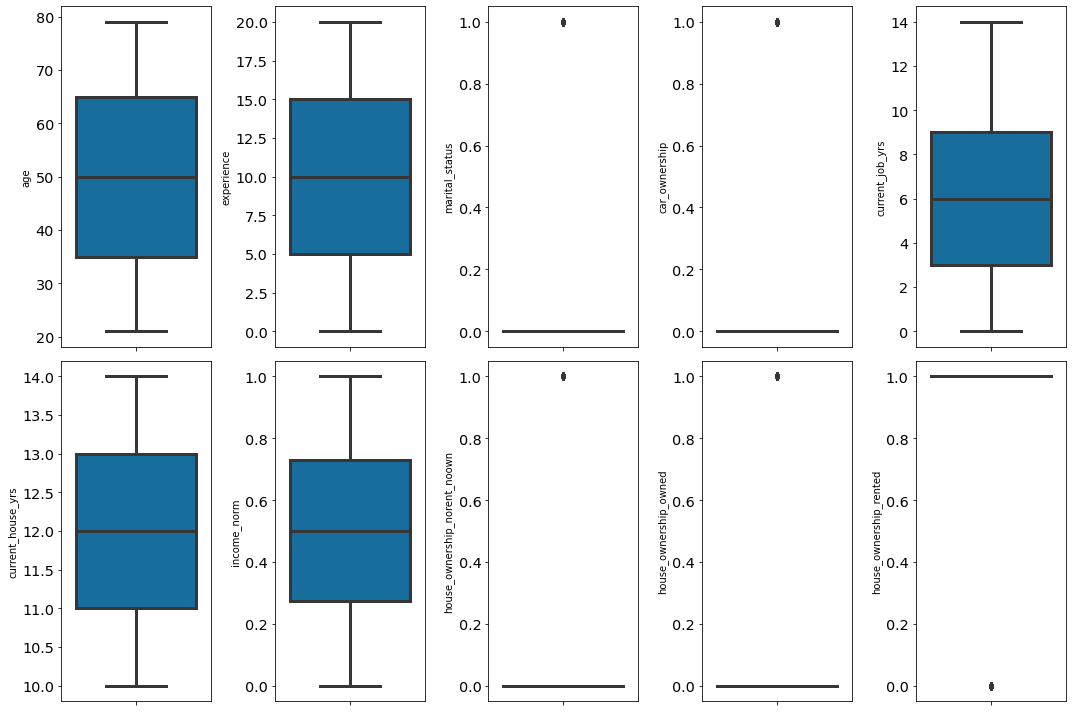

In [ ]:
sns.set_palette("colorblind")
plt.figure(figsize=(15, 10))
list(enumerate(general))
for i in (enumerate(general)) :
    plt.subplot(2,5,i[0]+1)
    sns.boxplot(y=df[i[1]], orient='v')
    plt.tight_layout()

* Grafik boxplot kategori general diatas menunjukkan bahwa `tidak ada outlier` di masing-masing feature
* Untuk feature `age`, `experience`, `current_job_yrs`, `current_house_yrs`, dan `income_norm` menunjukkan distribusi data `normal` dan tidak ada tanda-tanda skewed
* Sedangkan untuk feature `marital_statuss`, `car_ownership`, `house_ownership_norent_noown`, `house_ownership_owned`, dan `house_ownership_owned` merupakan `feature binary` yang berarti nilainya 1 atau 0

### Plot-plot Kategori `General`

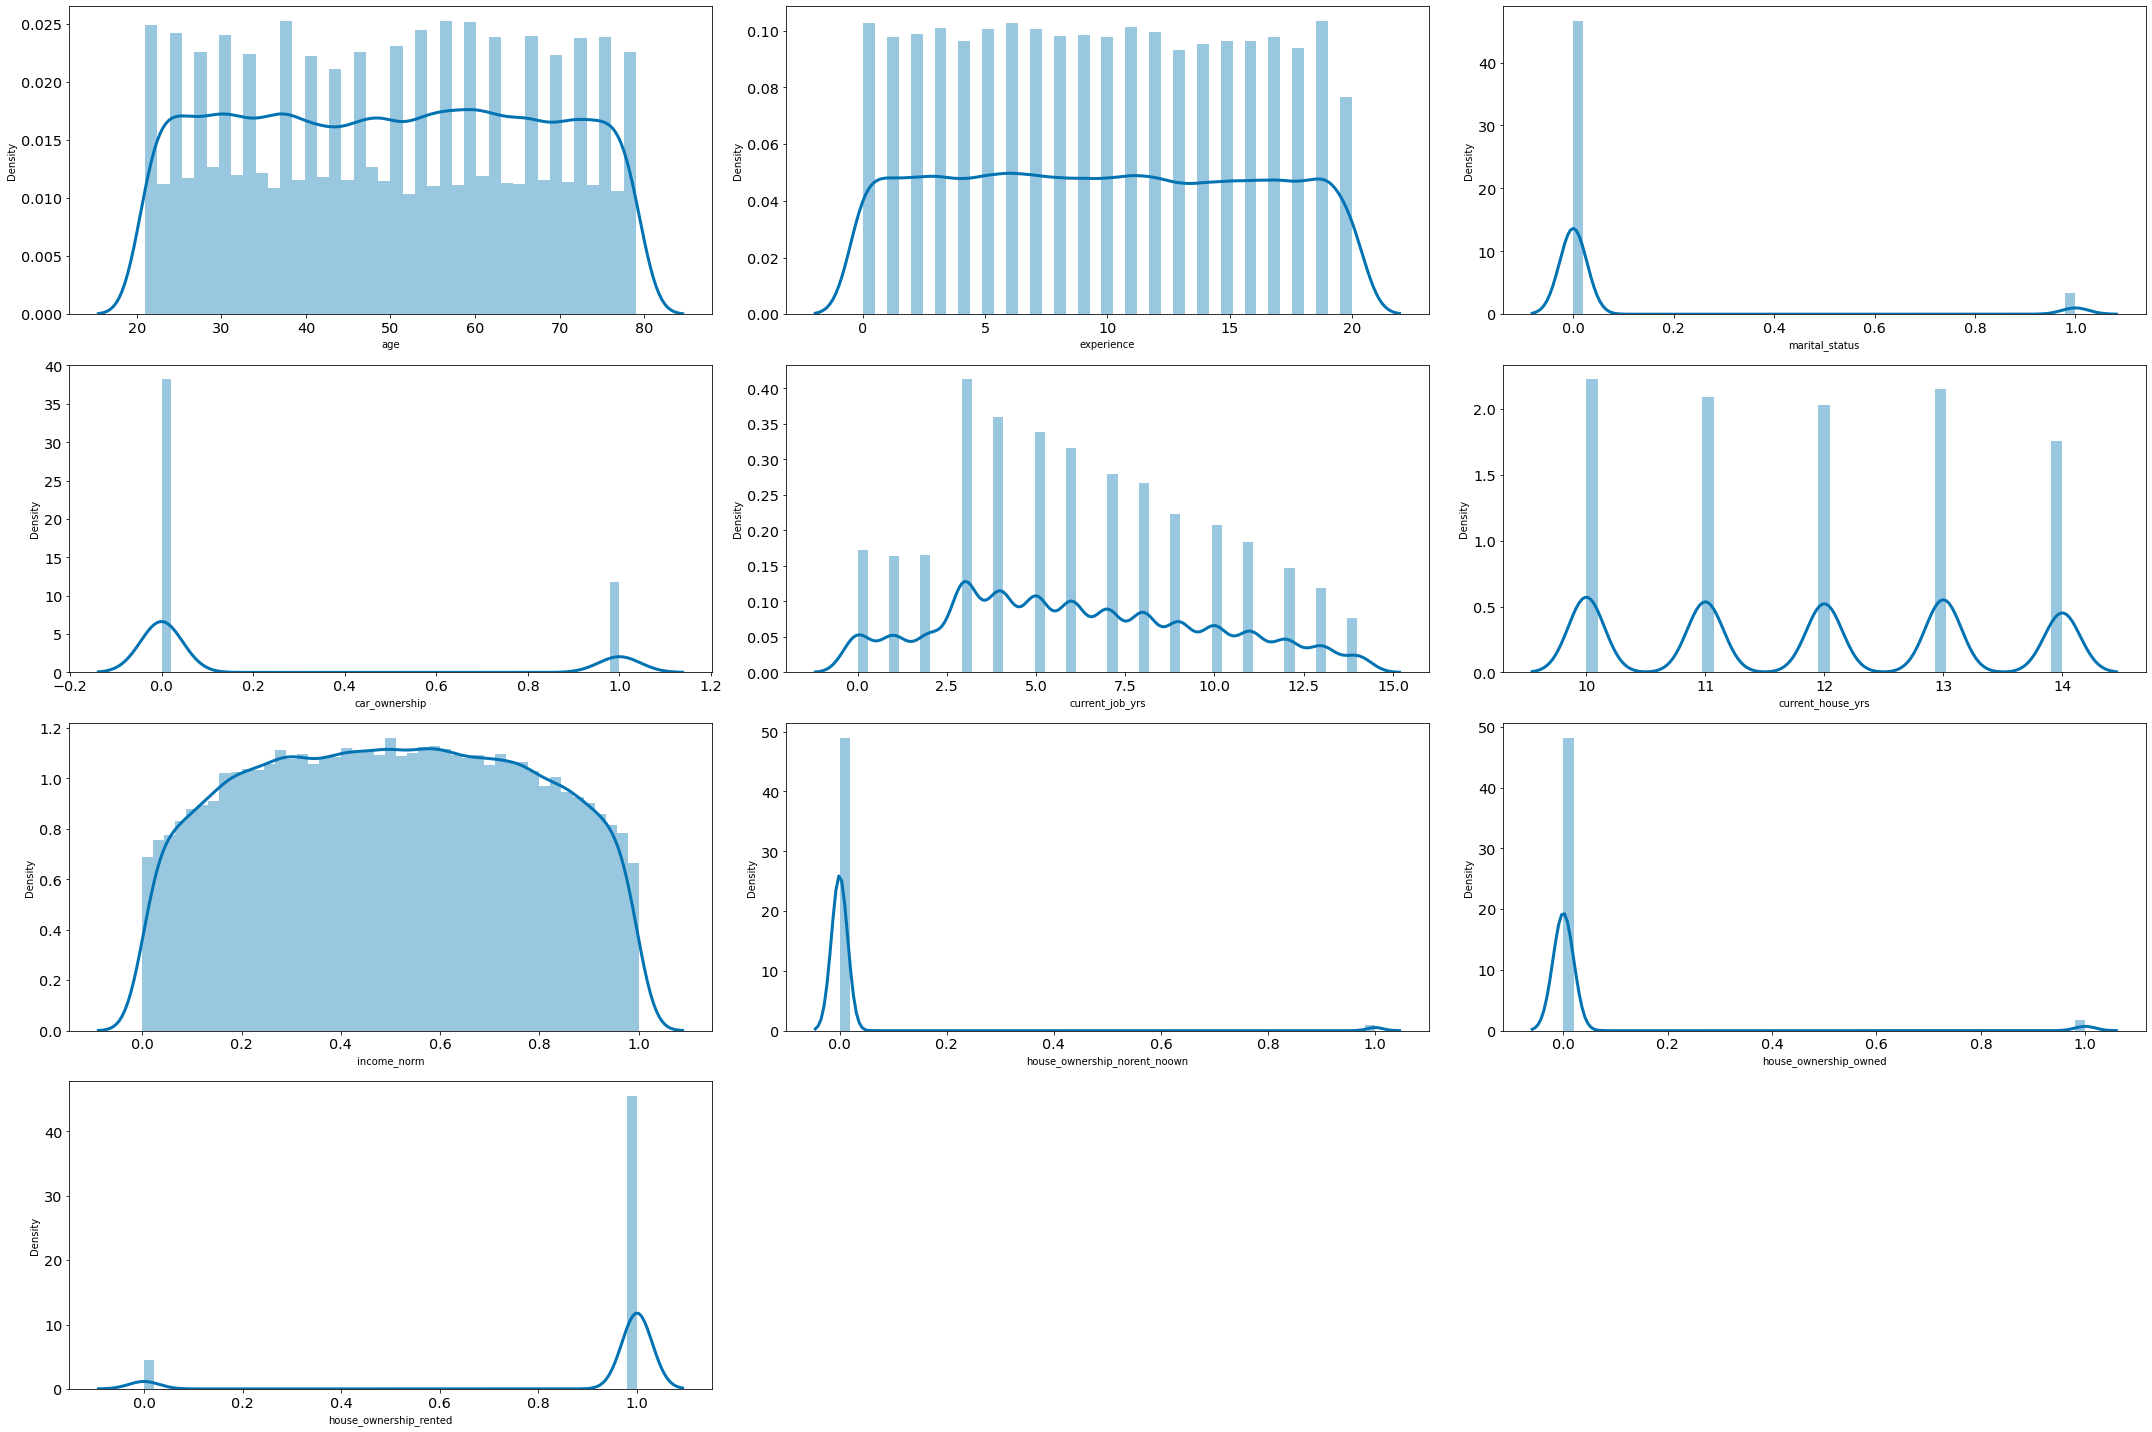

In [ ]:
sns.set_palette("colorblind")
plt.figure(figsize=(30, 20))
list(enumerate(general))
for i in (enumerate(general)):
    plt.subplot(4, 3, i[0]+1)
    sns.distplot(df[i[1]])
    plt.tight_layout()

* Dari distribusi plot semua feature dalam kategori General terlihat bahwa feature `age`, `experience`, dan `income_norm` memiliki distribusi `uniform`
* Sedangkan untuk feature `marital_status`, `car_ownership`, `house_ownership_norent_noown`, `house_ownership_owned`, dan `house_ownership_rented`memili nilai binary yang merepresentasikan nilai ya atau tidak
* Untung feature `current_job_years` memiliki bentuk distribusi `uniform` namun dengan nilai yang berbeda mulai dari di atas 2.5 years

Text(0.5, 1.0, 'Figure of Age versus Risk Flag')

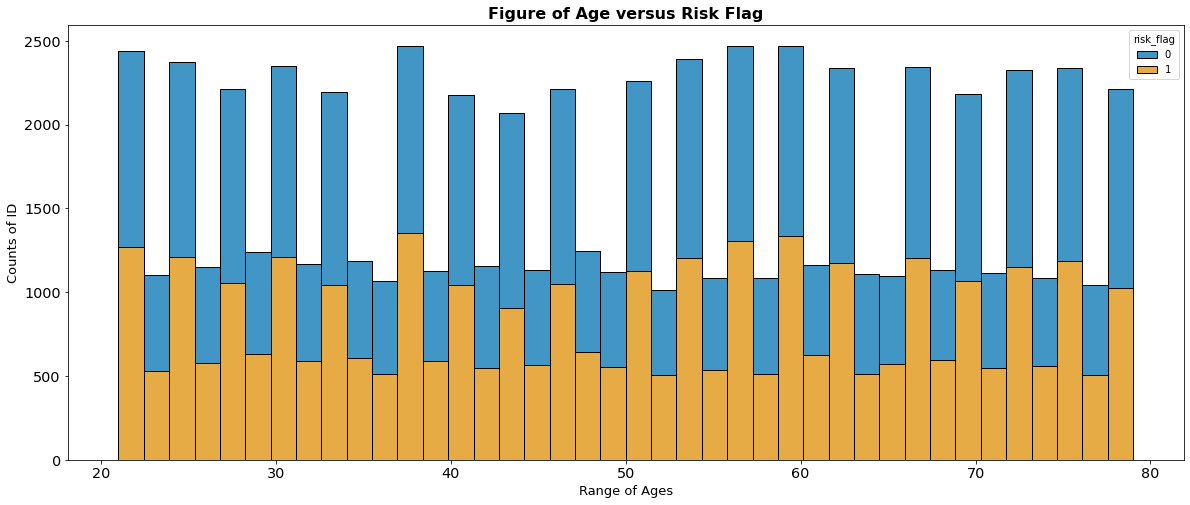

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=df, x="age", hue="risk_flag", multiple="stack")

plt.xlabel('Range of Ages', size=13)
plt.ylabel('Counts of ID', size=13)
plt.title('Figure of Age versus Risk Flag', size=16, weight=600)

* Figure histogram untuk feature `age` terhadap `risk_flag` menujukkan bahwa jumlah orang yang memiliki resiko gagal bayar mempunyai `rata-rata` yang hampir `sama` di setiap rentang usia

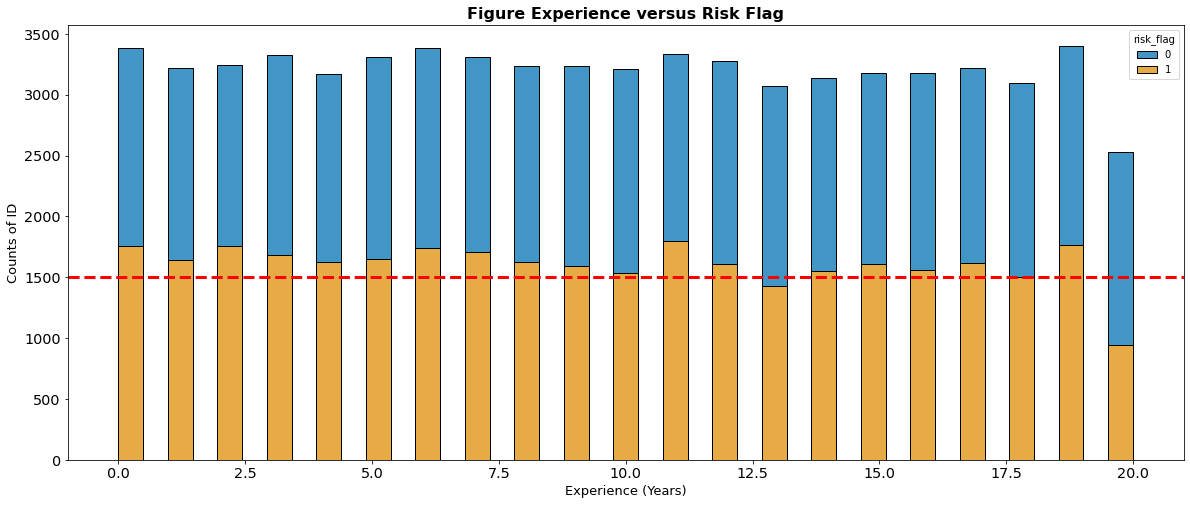

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=df, x="experience", hue="risk_flag", multiple="stack")

plt.xlabel('Experience (Years)', size=13)
plt.ylabel('Counts of ID', size=13)
plt.title('Figure Experience versus Risk Flag', size=16, weight=600)

plt.axhline(y=1500, color='red', linestyle='--')

* Figure histogram untuk feature `experience` terhadap `risk_flag` menunjukkan bahwa orang dengan rata-rata experience kerjaa diatas 17.5 tahun cenderung untuk tidak melakukan gagal bayar dibanding dengan rata-rata experience kerja dibawag 17.5 tahun

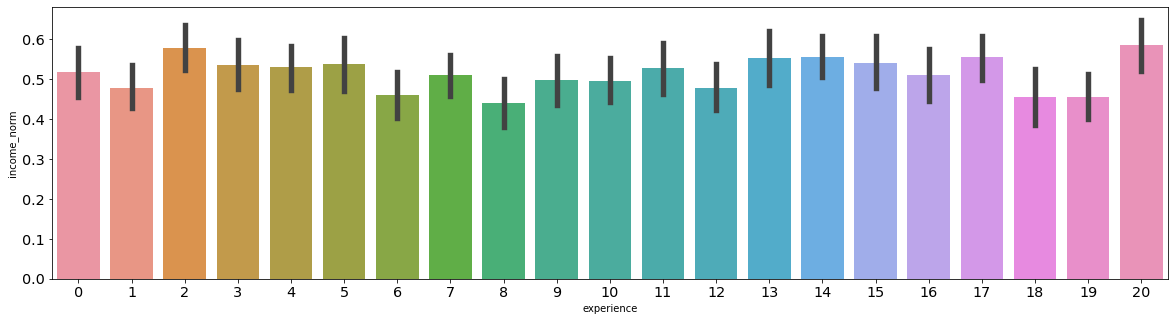

In [ ]:
plt.figure(figsize=(20,5))
df_prof_health = df[df['profession_assistant_science_engineering']==1]
sns.barplot(x="experience", y="income_norm", data=df_prof_health);

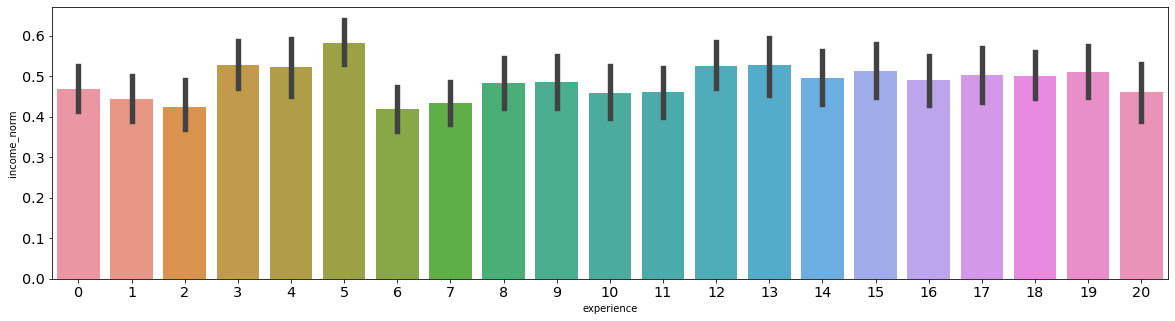

In [ ]:
plt.figure(figsize=(20,5))
df_prof_health = df[df['profession_business_administration']==1]
sns.barplot(x="experience", y="income_norm", data=df_prof_health);

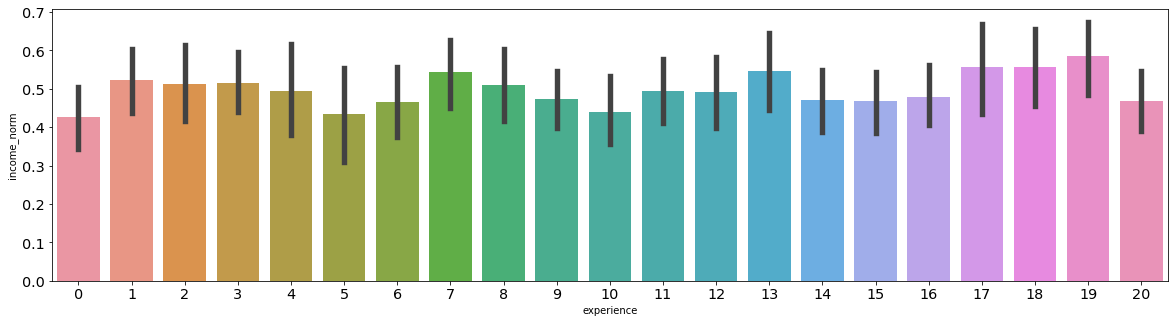

In [ ]:
plt.figure(figsize=(20,5))
df_prof_health = df[df['profession_firefighter']==1]
sns.barplot(x="experience", y="income_norm", data=df_prof_health);

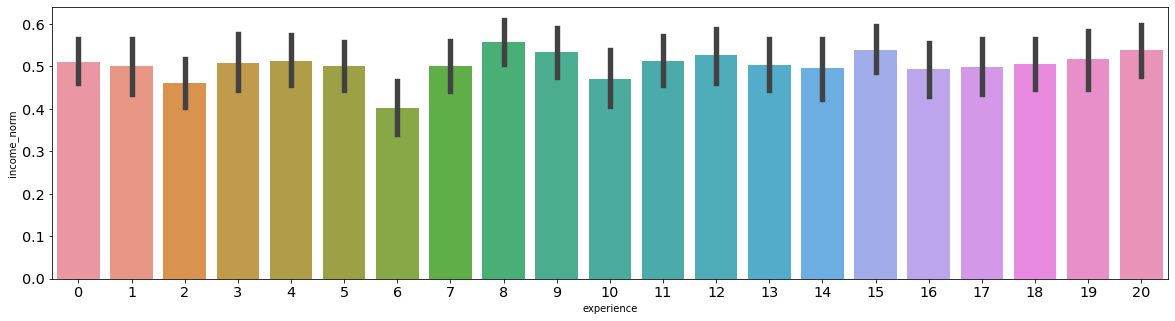

In [ ]:
plt.figure(figsize=(20,5))
df_prof_health = df[df['profession_government']==1]
sns.barplot(x="experience", y="income_norm", data=df_prof_health);

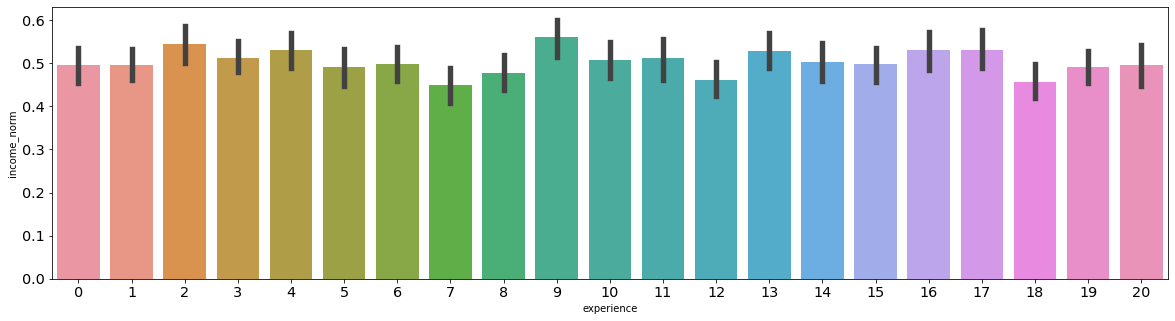

In [ ]:
plt.figure(figsize=(20,5))
df_prof_health = df[df['profession_health']==1]
sns.barplot(x="experience", y="income_norm", data=df_prof_health);

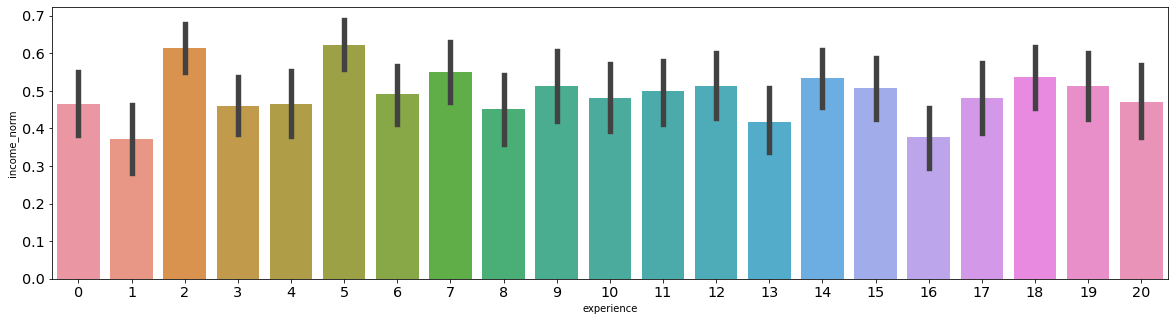

In [ ]:
plt.figure(figsize=(20,5))
df_prof_health = df[df['profession_hotel_manager']==1]
sns.barplot(x="experience", y="income_norm", data=df_prof_health);

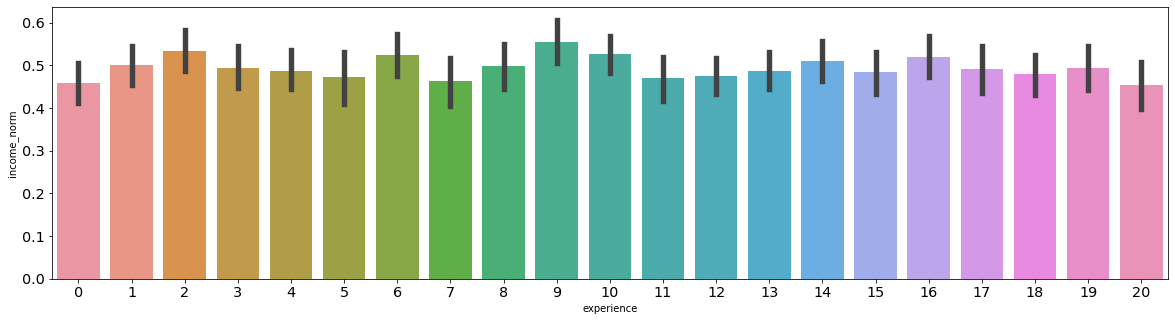

In [ ]:
plt.figure(figsize=(20,5))
df_prof_health = df[df['profession_individual_business_personnel']==1]
sns.barplot(x="experience", y="income_norm", data=df_prof_health);

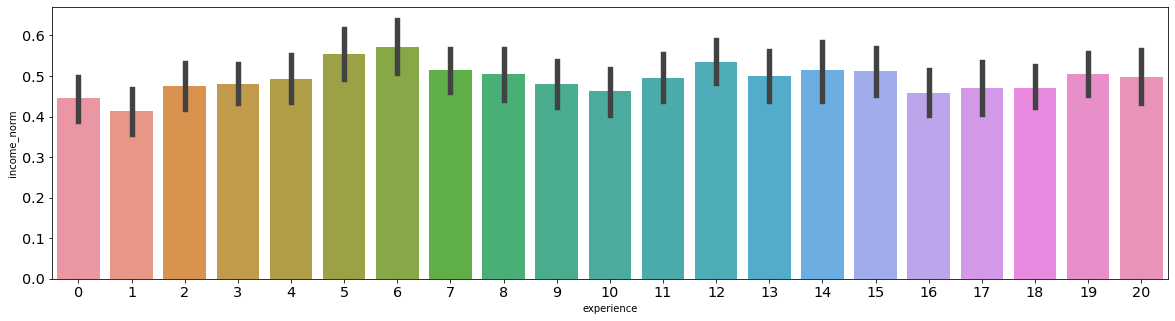

In [ ]:
plt.figure(figsize=(20,5))
df_prof_health = df[df['profession_information_communication_technology']==1]
sns.barplot(x="experience", y="income_norm", data=df_prof_health);

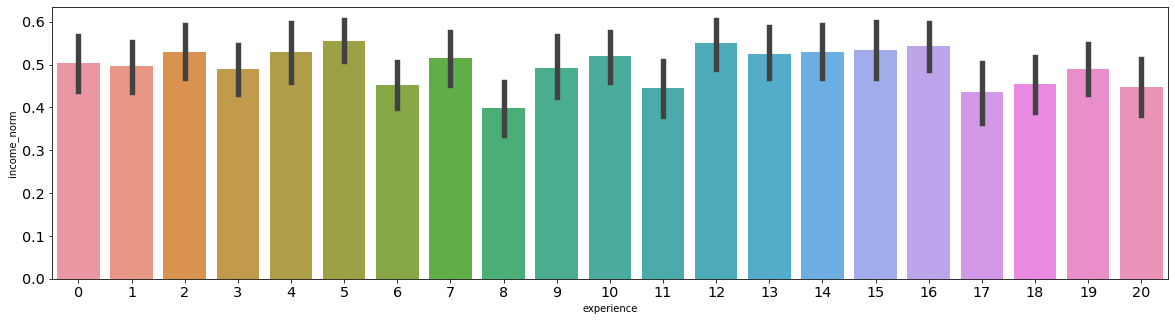

In [ ]:
plt.figure(figsize=(20,5))
df_prof_health = df[df['profession_military_and_police']==1]
sns.barplot(x="experience", y="income_norm", data=df_prof_health);

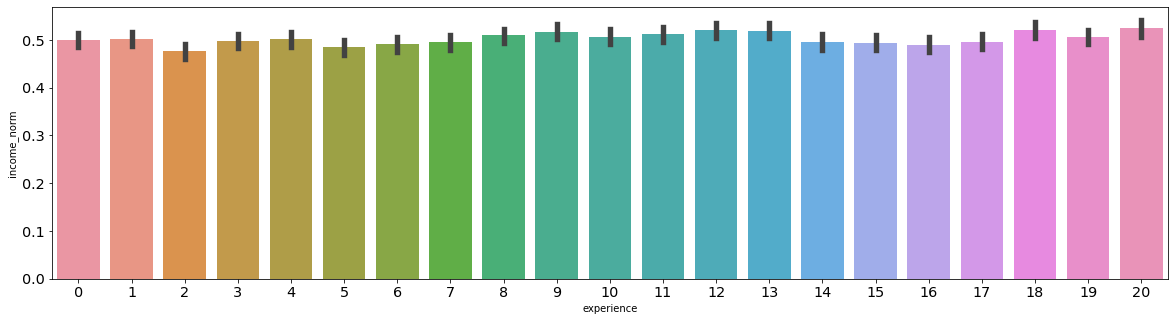

In [ ]:
plt.figure(figsize=(20,5))
df_prof_health = df[df['profession_science_engineering']==1]
sns.barplot(x="experience", y="income_norm", data=df_prof_health);

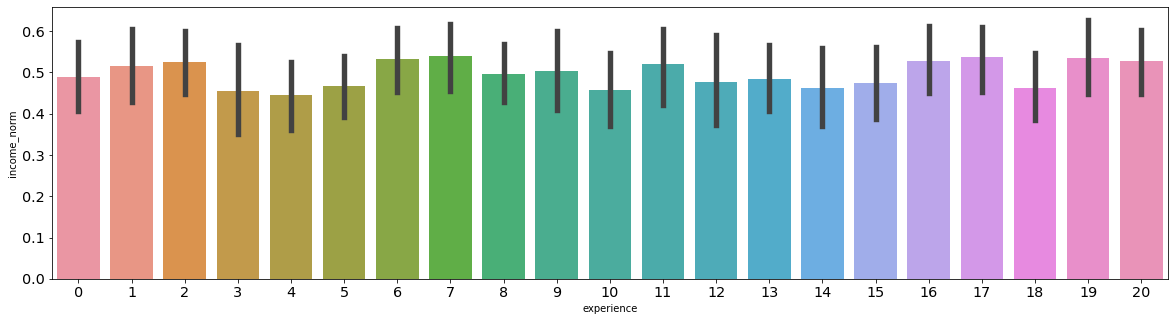

In [ ]:
plt.figure(figsize=(20,5))
df_prof_health = df[df['profession_secretary']==1]
sns.barplot(x="experience", y="income_norm", data=df_prof_health);

<Figure size 2160x360 with 0 Axes>

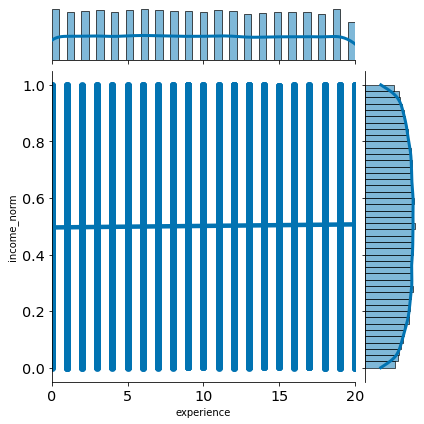

In [ ]:
plt.figure(figsize=(30,5))
sns.jointplot(x="experience", y="income_norm", data=df, kind='reg');

* Figure plot diatas menunjukkan bahwa korelasi atau hubungan antara `experience` dan `income_norm` atau pemasukan mempunyai hubungan yang `sangat lemah`. Hal ini berarti bahwa lama pengalaman kerja (dalam tahun) tidak merepresentasikan meningkatnya pendapatan

Text(0.5, 1.0, 'Figure Marital Status Versus Risk Flag')

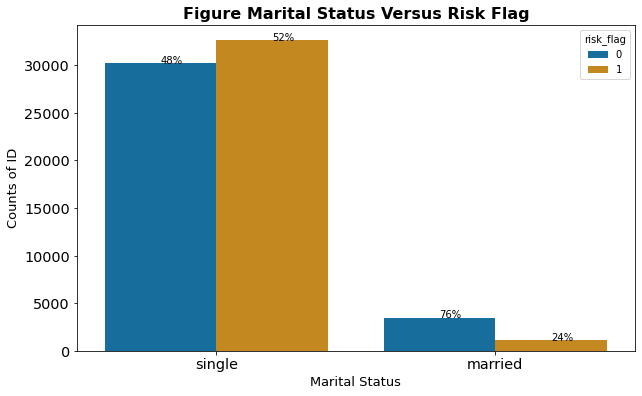

In [ ]:
sns.set_palette("colorblind")
plt.figure(figsize=(10,6))
ax=sns.countplot(x="marital_status",hue="risk_flag",data=df)
patch = ax.patches
half = int(len(patch)/2)
for i in range(half):
  pat_1= patch[i]
  pat_2 = patch[i+half]
  height_1 = pat_1.get_height()
  height_2 = pat_2.get_height()
  total = height_1  + height_2
  width_1 = pat_1.get_x()+pat_1.get_width()/2
  width_2 = pat_2.get_x()+pat_2.get_width()/2
  ax.text(width_1,height_1+1,"{:.0%}".format(height_1/total))
  ax.text(width_2,height_2+1,"{:.0%}".format(height_2/total))
ax.set_xticklabels(['single', 'married'])

plt.xlabel('Marital Status', size=13)
plt.ylabel('Counts of ID', size=13)
plt.title('Figure Marital Status Versus Risk Flag', size=16, weight=600)

* Figure `countplot` antara `marital_status` dengan `risk_flag` menunjukkan bahwa orang dengan latar belakang `single` atau belum/tidak menikah mempunyai kecenderungan untuk gagal bayar dibandingkan dengan orang yang mempunyai latar belakang sudah menikah
* Dari populasi customer single, `52%` populasi mengalami potensi gagal bayar. Ratio ini tergolong besar jika dibanding dengan potensi gagal bayar di kelompok married. Oleh karenanya customer dengan status single cenderung mempunyai potensi gagal bayar yang tinggi

Text(0.5, 1.0, 'Figure House Ownership Rented vs Marital Status')

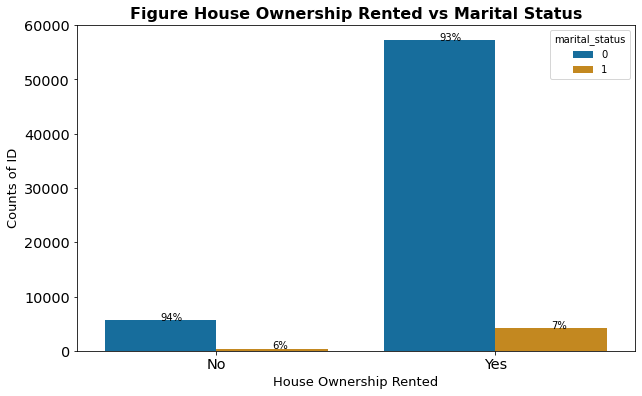

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="house_ownership_rented",hue="marital_status",data=df)
patch = ax.patches
half = int(len(patch)/2)
for i in range(half):
  pat_1= patch[i]
  pat_2 = patch[i+half]
  height_1 = pat_1.get_height()
  height_2 = pat_2.get_height()
  total = height_1  + height_2
  width_1 = pat_1.get_x()+pat_1.get_width()/2
  width_2 = pat_2.get_x()+pat_2.get_width()/2
  ax.text(width_1,height_1+1,"{:.0%}".format(height_1/total))
  ax.text(width_2,height_2+1,"{:.0%}".format(height_2/total))
ax.set_xticklabels(['No', 'Yes'])

plt.xlabel('House Ownership Rented', size=13)
plt.ylabel('Counts of ID', size=13)
plt.title('Figure House Ownership Rented vs Marital Status', size=16, weight=600)

* Figure `countplot` antara `house_ownership_rented` dengan `marital_status` menunjukkan bahwa `93%` customer dengan status single cenderung untuk menyewa rumah
* Melihat dari fakta diatas, hal ini align dengan figure `marital status versi risk flag`, dimana customer single cenderung menyewa rumah dan berpotensi gagal bayar

Text(0.5, 1.0, 'Figure House Ownership Owned vs Marital Status')

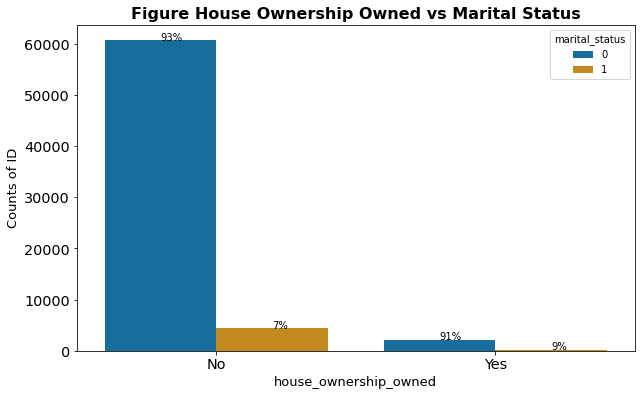

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="house_ownership_owned",hue="marital_status",data=df)
patch = ax.patches
half = int(len(patch)/2)
for i in range(half):
  pat_1= patch[i]
  pat_2 = patch[i+half]
  height_1 = pat_1.get_height()
  height_2 = pat_2.get_height()
  total = height_1  + height_2
  width_1 = pat_1.get_x()+pat_1.get_width()/2
  width_2 = pat_2.get_x()+pat_2.get_width()/2
  ax.text(width_1,height_1+1,"{:.0%}".format(height_1/total))
  ax.text(width_2,height_2+1,"{:.0%}".format(height_2/total))
ax.set_xticklabels(['No', 'Yes'])

plt.xlabel('house_ownership_owned', size=13)
plt.ylabel('Counts of ID', size=13)
plt.title('Figure House Ownership Owned vs Marital Status', size=16, weight=600)

* Figure `countplot` antara `house_ownership_owned` dengan `marital_status` menunjukkan bahwa `93%` customer dengan status single cenderung tidak memiliki rumah 

Text(0.5, 1.0, 'Figure House Ownership Norent Noown vs Marital Status')

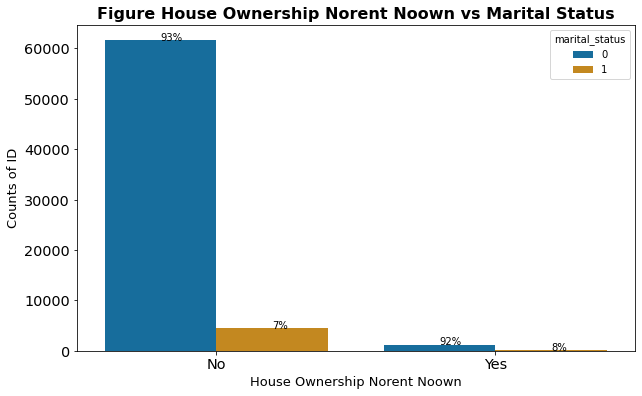

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="house_ownership_norent_noown",hue="marital_status",data=df)
patch = ax.patches
half = int(len(patch)/2)
for i in range(half):
  pat_1= patch[i]
  pat_2 = patch[i+half]
  height_1 = pat_1.get_height()
  height_2 = pat_2.get_height()
  total = height_1  + height_2
  width_1 = pat_1.get_x()+pat_1.get_width()/2
  width_2 = pat_2.get_x()+pat_2.get_width()/2
  ax.text(width_1,height_1+1,"{:.0%}".format(height_1/total))
  ax.text(width_2,height_2+1,"{:.0%}".format(height_2/total))
ax.set_xticklabels(['No', 'Yes'])

plt.xlabel('House Ownership Norent Noown', size=13)
plt.ylabel('Counts of ID', size=13)
plt.title('Figure House Ownership Norent Noown vs Marital Status', size=16, weight=600)

* Figure `countplot` antara `house_ownership_noown` dengan `marital_status` menunjukkan bahwa `93%` customer dengan status single cenderung untuk tidak menyewa rumah maupun memiliki rumah

Text(0.5, 1.0, 'Figure Car Ownership vs Risk Flag')

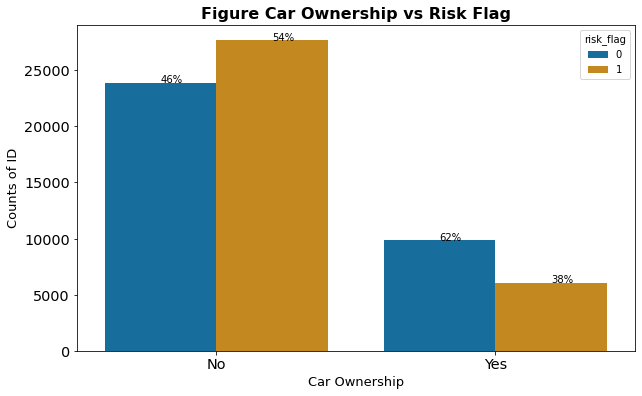

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="car_ownership",hue="risk_flag",data=df)
patch = ax.patches
half = int(len(patch)/2)
for i in range(half):
  pat_1= patch[i]
  pat_2 = patch[i+half]
  height_1 = pat_1.get_height()
  height_2 = pat_2.get_height()
  total = height_1  + height_2
  width_1 = pat_1.get_x()+pat_1.get_width()/2
  width_2 = pat_2.get_x()+pat_2.get_width()/2
  ax.text(width_1,height_1+1,"{:.0%}".format(height_1/total))
  ax.text(width_2,height_2+1,"{:.0%}".format(height_2/total))
ax.set_xticklabels(['No', 'Yes'])

plt.xlabel('Car Ownership', size=13)
plt.ylabel('Counts of ID', size=13)
plt.title('Figure Car Ownership vs Risk Flag', size=16, weight=600)

* Figure `countplot` antara `car_ownership` dengan `risk_flag` menunjukkan bahwa orang yang tidak mempunyai mobil cenderung untuk mengalami gagal bayar dibanding dengan orang yang mempunyai mobil

Text(0.5, 1.0, 'House Ownership Rented vs Marital Status')

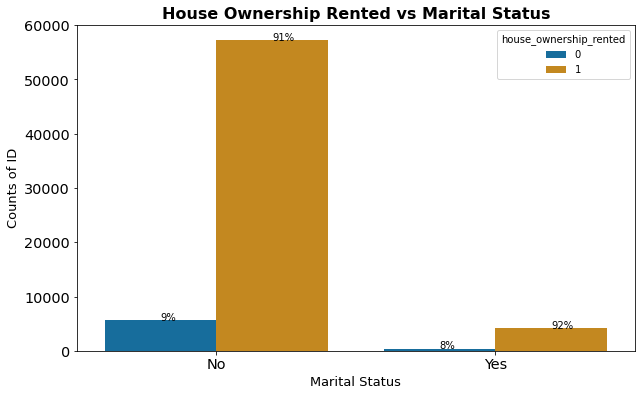

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="marital_status",hue="house_ownership_rented",data=df)
patch = ax.patches
half = int(len(patch)/2)
for i in range(half):
  pat_1= patch[i]
  pat_2 = patch[i+half]
  height_1 = pat_1.get_height()
  height_2 = pat_2.get_height()
  total = height_1  + height_2
  width_1 = pat_1.get_x()+pat_1.get_width()/2
  width_2 = pat_2.get_x()+pat_2.get_width()/2
  ax.text(width_1,height_1+1,"{:.0%}".format(height_1/total))
  ax.text(width_2,height_2+1,"{:.0%}".format(height_2/total))
ax.set_xticklabels(['No', 'Yes'])

plt.xlabel('Marital Status', size=13)
plt.ylabel('Counts of ID', size=13)
plt.title('House Ownership Rented vs Marital Status', size=16, weight=600)

* Figure `countplot` antara `house_ownership_rented` dengan `marital_status` menunjukkan bahwa orang yang single cenderung untuk menyewa rumah dibanding dengan orang berstatus married

Text(0.5, 1.0, 'Figure of Current House Years versus Risk Flag')

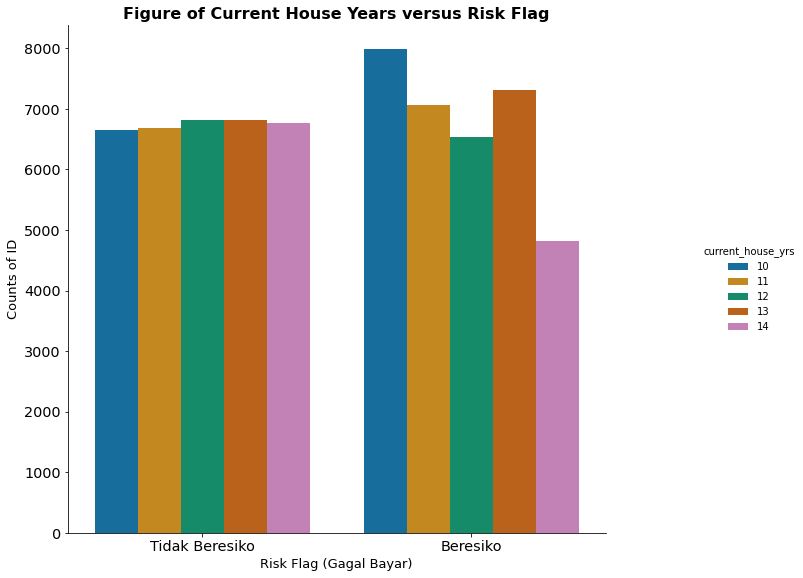

In [ ]:
sns.catplot(x="risk_flag", kind="count", palette="colorblind", data=df, hue ="current_house_yrs")
fig = plt.gcf()
fig.set_size_inches(12, 8)

x = [0,1]
val =["Tidak Beresiko", "Beresiko"]
plt.xticks(x,val)

plt.xlabel('Risk Flag (Gagal Bayar)', size=13)
plt.ylabel('Counts of ID', size=13)
plt.title('Figure of Current House Years versus Risk Flag', size=16, weight=600)

* Figure `catplot` antara `current_house_yrs` dengan `risk_flag` menunjukkan bahwa pasti terdapat orang yang beresiko gagal bayar di setiap kelas tahunnya
* Secara garis besar, `ratio` antara gagal bayar dengan total populasi berkisar `di atas 30%` disetiap kelas tahunnya

Text(0.5, 1.0, 'Figure of Current Job Years versus Risk Flag')

<Figure size 2160x432 with 0 Axes>

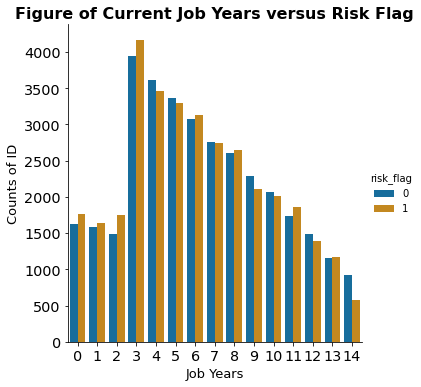

In [ ]:
plt.figure(figsize=(30,6))
sns.catplot(x="current_job_yrs", kind="count", palette="colorblind", data=df, hue="risk_flag")

plt.xlabel('Job Years', size=13)
plt.ylabel('Counts of ID', size=13)
plt.title('Figure of Current Job Years versus Risk Flag', size=16, weight=600)

* Figure `catplot` di atas menunjukkan hubungan antara `current_job_years` dengan `risk_flag`. Diagram tersebut menunjukkan bahwa ratio antara tahun bekerja hampir sama. Namun jika dilihat dari total deafaulters secara total jumlah, maka current job years antara 3-5 tahun mempunyai resiko gagal bayar lebih tinggi dibanding yang lainnya

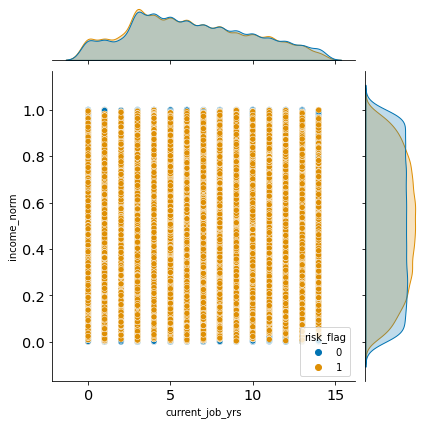

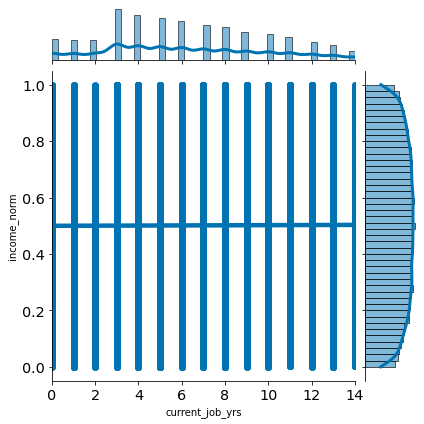

In [ ]:
sns.jointplot(data=df, x="current_job_yrs", y="income_norm", hue="risk_flag")
sns.jointplot(x="current_job_yrs", y="income_norm", data=df, kind='reg')

* Figure plot diatas menunjukkan bahwa korelasi atau hubungan antara `current_job_yrs` dan `income_norm` atau pemasukan mempunyai hubungan yang `sangat lemah`. Hal ini berarti bahwa tahun bekerja saat ini tidak merepresentasikan meningkatnya pendapatan

Text(0.5, 1.0, 'Figure of Income versus Risk Flag')

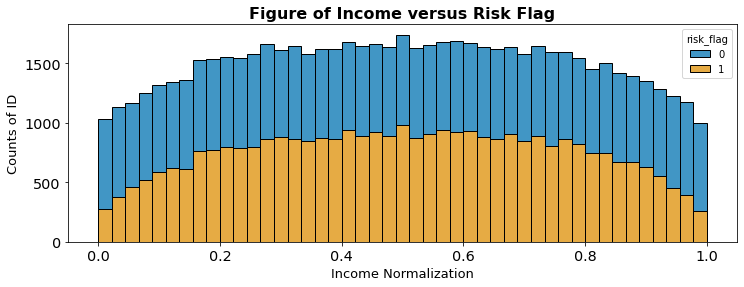

In [ ]:
sns.histplot(data=df, x="income_norm", hue="risk_flag", multiple="stack")

plt.xlabel('Income Normalization', size=13)
plt.ylabel('Counts of ID', size=13)
plt.title('Figure of Income versus Risk Flag', size=16, weight=600)

* Figure `hisplot` diatas menunjukkan bahwa korelasi atau hubungan antara `income_norm` dan `risk_flag` cenderung memiliki ratio yang sama. 
* Dari segi bentuk distribusinya juga merupakan uniform, sehingga menunjukkan bahwa data tersebut mempunya density yang hampir mirip antara satu dan yang lainnya 

## MULTIVARIATE ANALYSIS

In [ ]:
a = df.iloc[:,0:10]
b = df.iloc[:,-1]
general_1 = pd.concat([a, b], axis=1)
general_1.corr()

,age,experience,marital_status,car_ownership,current_job_yrs,current_house_yrs,income_norm,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,risk_flag
age,1.000000,-0.002157,0.006727,0.007772,-0.000821,0.006806,-0.003158,0.003952,-0.001384,0.003296,-0.001975
experience,-0.002157,1.000000,0.003595,-0.003431,0.668671,-0.001686,0.011899,-0.000438,0.006283,-0.009854,-0.029511
marital_status,0.006727,0.003595,1.000000,0.028915,0.006612,0.020351,-0.008885,0.008611,0.019119,0.006523,-0.141458
car_ownership,0.007772,-0.003431,0.028915,1.000000,-0.003284,0.019153,-0.020025,0.016845,0.016918,0.008994,-0.132864
current_job_yrs,-0.000821,0.668671,0.006612,-0.003284,1.000000,0.002657,0.003054,0.003109,-0.000552,-0.005390,-0.023941
current_house_yrs,0.006806,-0.001686,0.020351,0.019153,0.002657,1.000000,0.003511,0.010429,0.011707,0.004586,-0.068172
income_norm,-0.003158,0.011899,-0.008885,-0.020025,0.003054,0.003511,1.000000,-0.008005,-0.006099,0.010416,0.006410
house_ownership_norent_noown,0.003952,-0.000438,0.008611,0.016845,0.003109,0.010429,-0.008005,1.000000,-0.027050,-0.454703,-0.068576
house_ownership_owned,-0.001384,0.006283,0.019119,0.016918,-0.000552,0.011707,-0.006099,-0.027050,1.000000,-0.609540,-0.090693
house_ownership_rented,0.003296,-0.009854,0.006523,0.008994,-0.005390,0.004586,0.010416,-0.454703,-0.609540,1.000000,-0.027870


<AxesSubplot:>

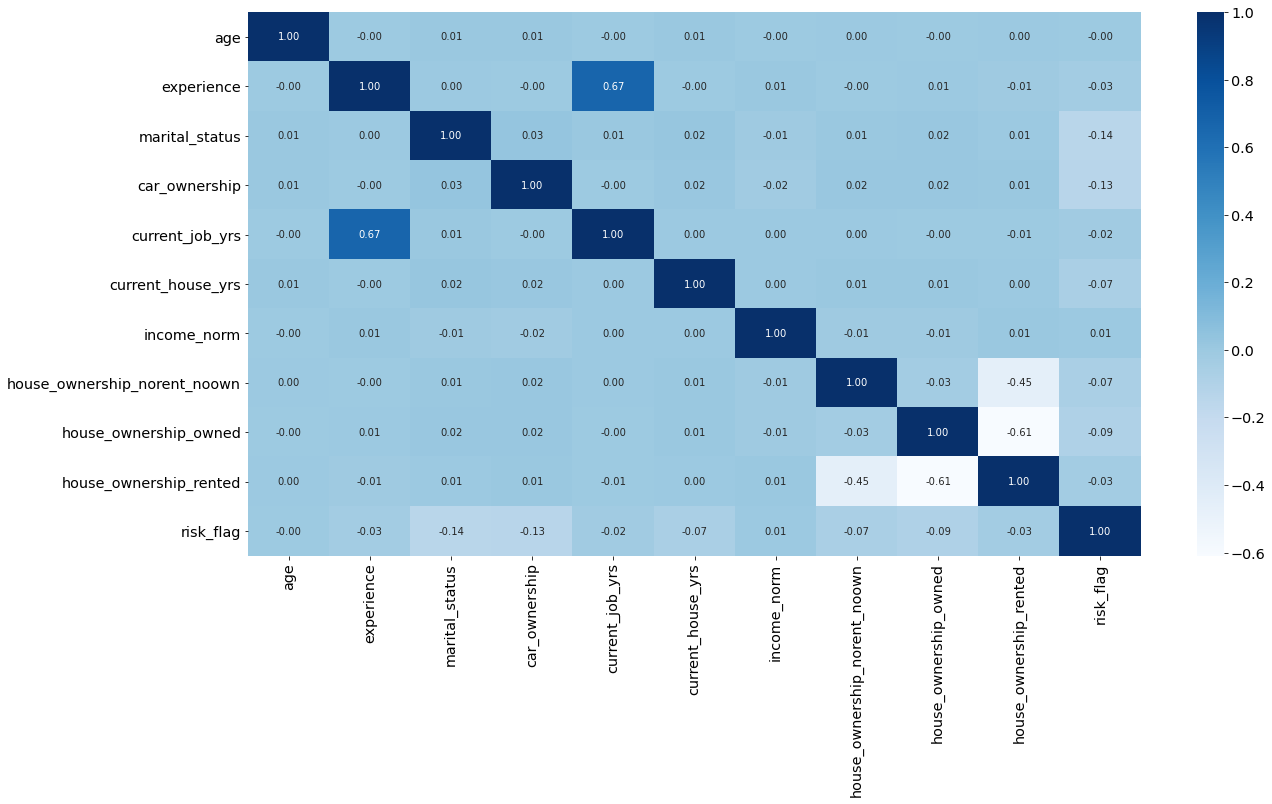

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(general_1.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
corr_general = general_1.corr()
corr_general["risk_flag"].sort_values(ascending=False)

risk_flag                       1.000000
income_norm                     0.006410
age                            -0.001975
current_job_yrs                -0.023941
house_ownership_rented         -0.027870
experience                     -0.029511
current_house_yrs              -0.068172
house_ownership_norent_noown   -0.068576
house_ownership_owned          -0.090693
car_ownership                  -0.132864
marital_status                 -0.141458
Name: risk_flag, dtype: float64

* Dari analisa `korelasi` baik secara `numeric maupun chart`, didapatkan informasi bahwa masing-masing feature mempunyai hubungan yang `lemah` terhadap target klasifikasi `risk_flag`. Sehingga dapat disimpulkan bahwa hubungan antara feature dan target klasifikasi bersifat `non-linear`
* `income_norm` mempunyai `korelasi positif` yang terdekat dengan `risk_flag`
* `marital_status` mempunyai `korelasi negatif` yang terjauh dengan `risk_flag`

<Figure size 1080x1080 with 0 Axes>

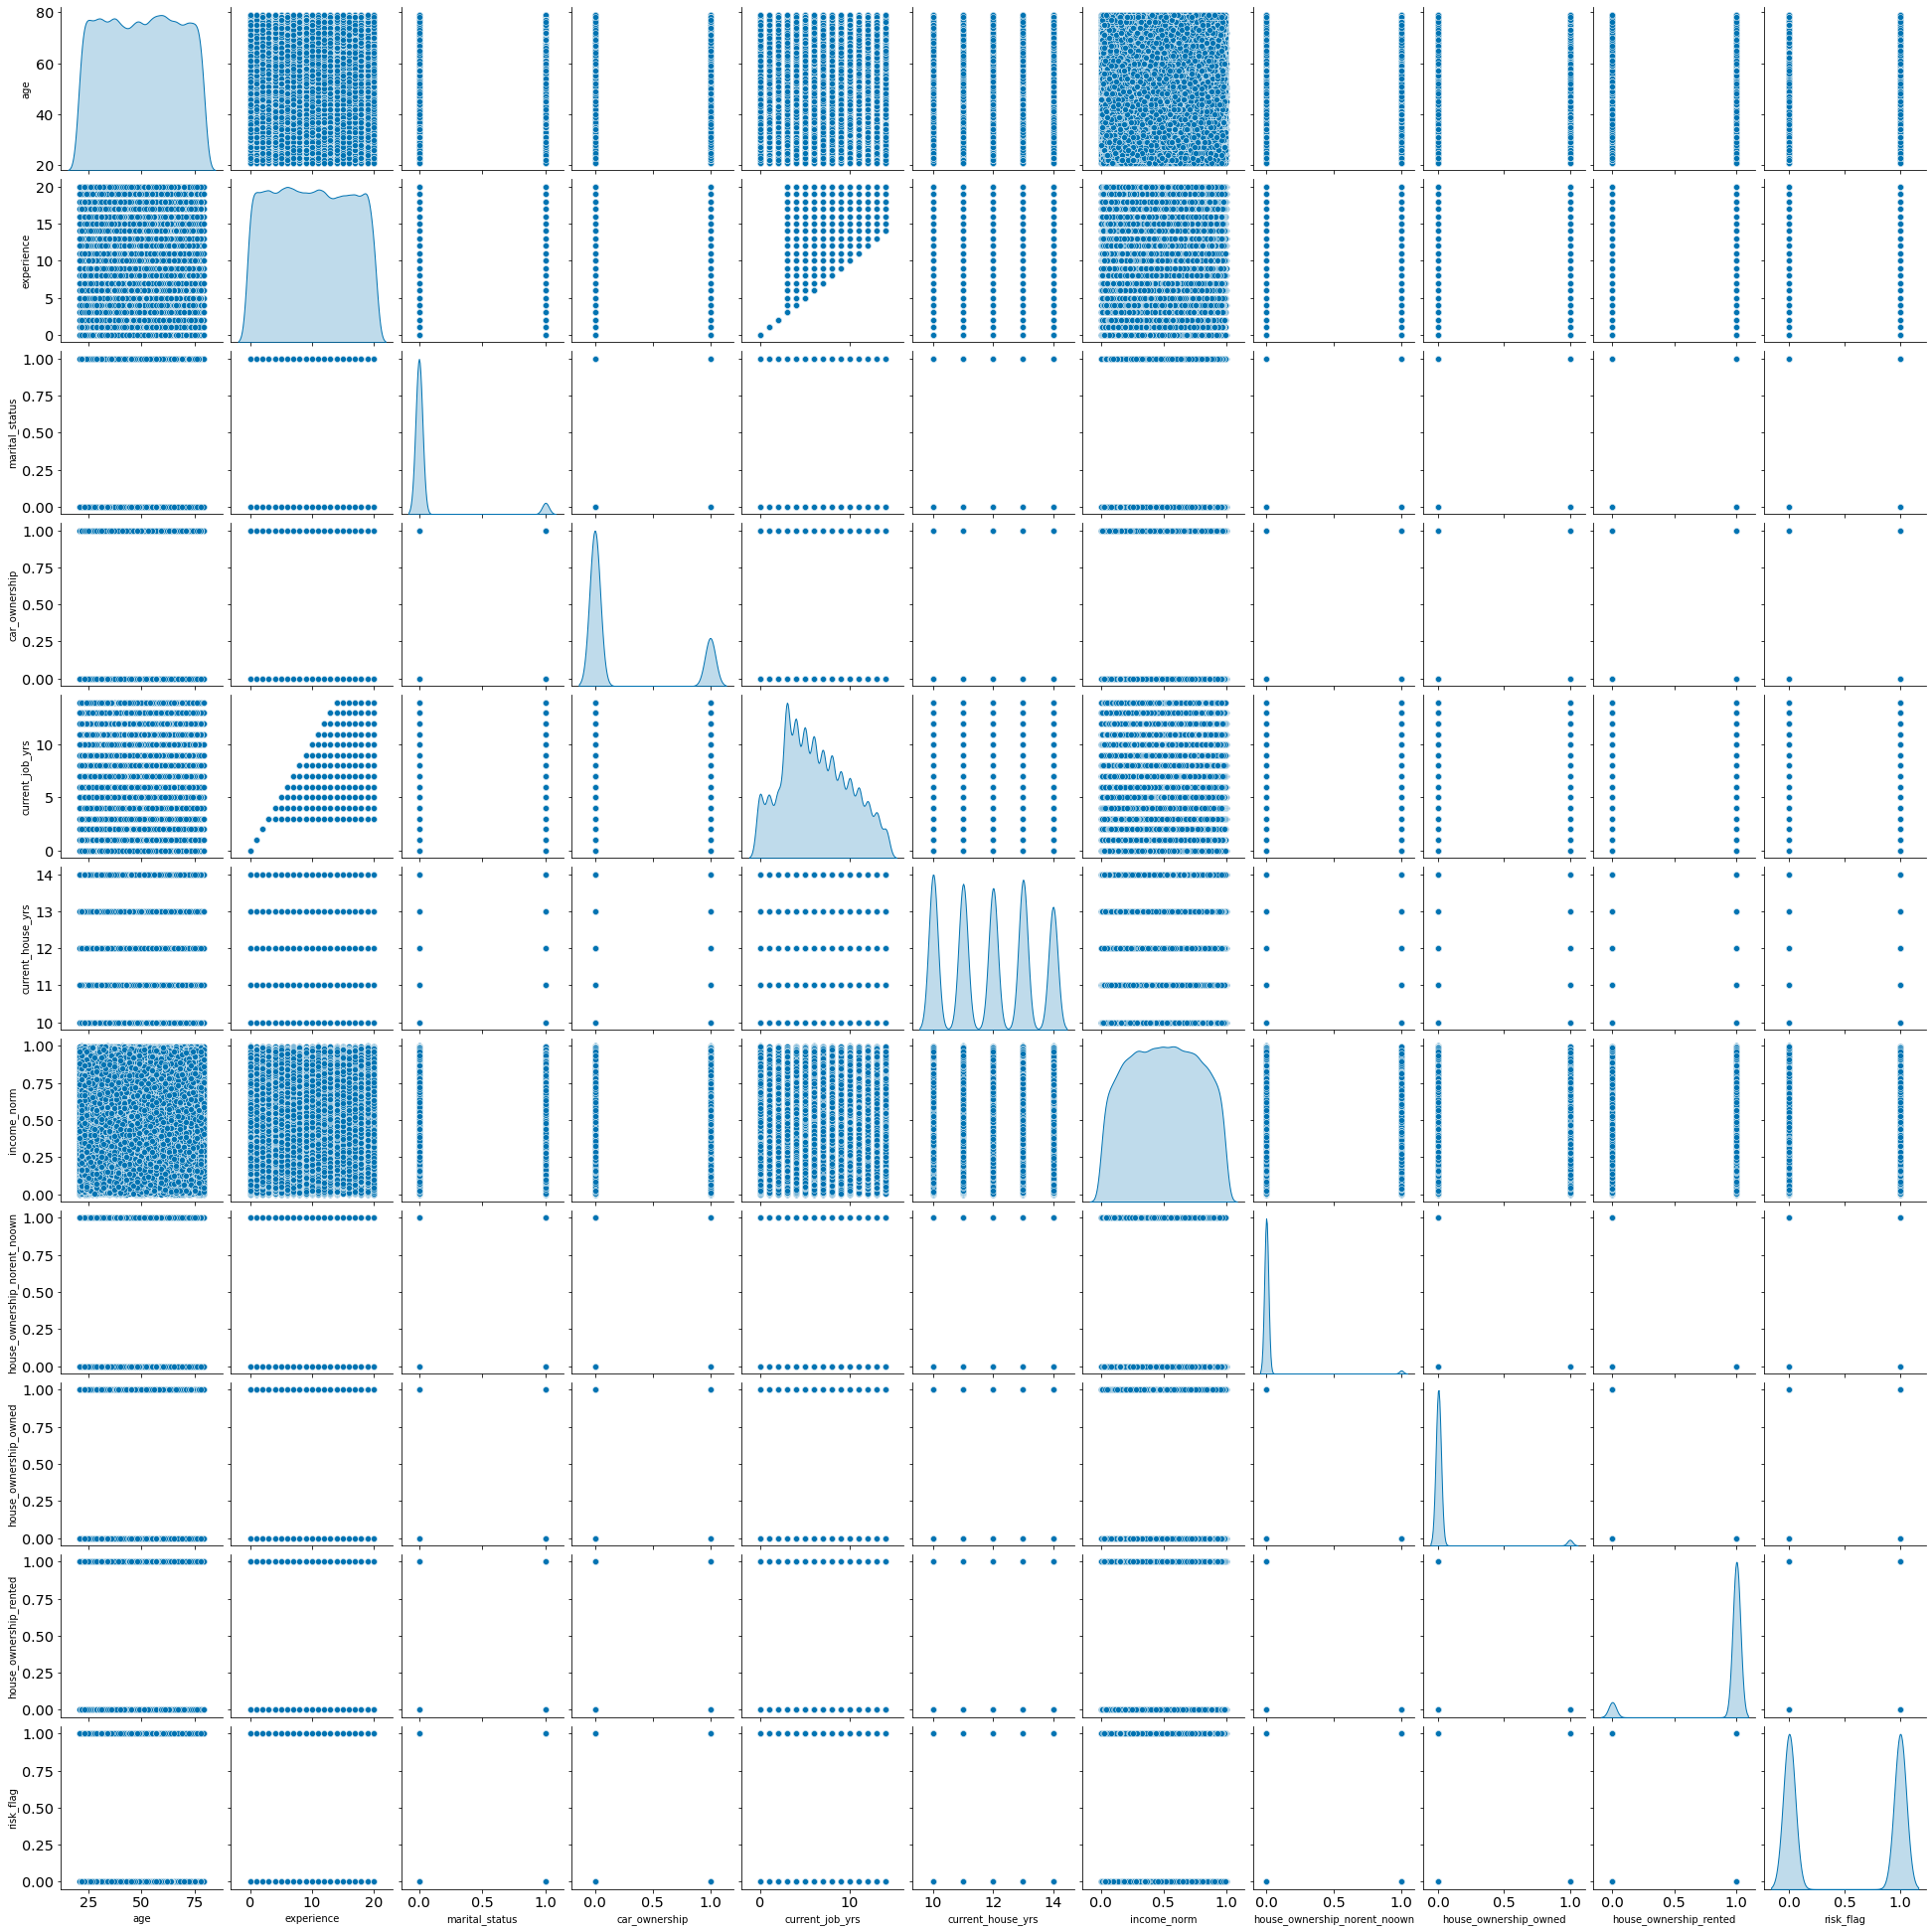

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(general_1, diag_kind='kde')

#sns.pairplot(general_1, hue="risk_flag")

### Plot-plot Kategori Profession

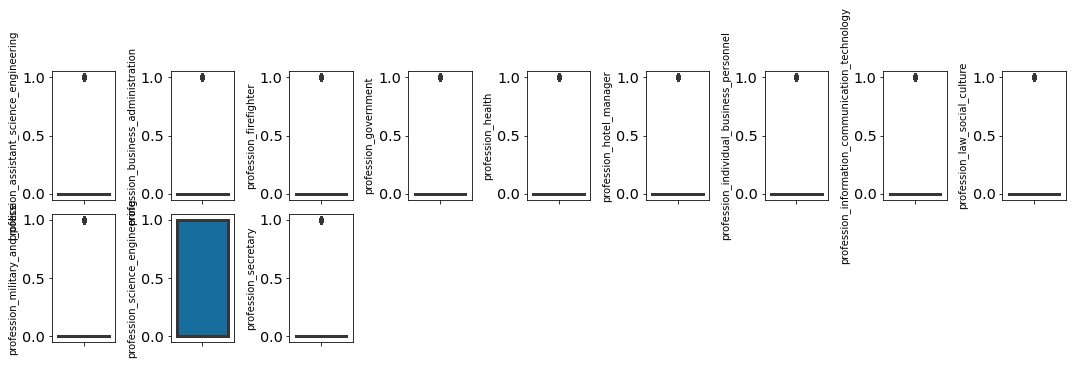

In [ ]:
sns.set_palette("colorblind")
plt.figure(figsize=(15, 10))
list(enumerate(profession))
for i in (enumerate(profession)) :
    plt.subplot(5,9,i[0]+1)
    sns.boxplot(y=df[i[1]], orient='v')
    plt.tight_layout()

* Grafik boxplot `kategori profession` diatas menunjukkan bahwa `tidak ada outlier` di masing-masing feature

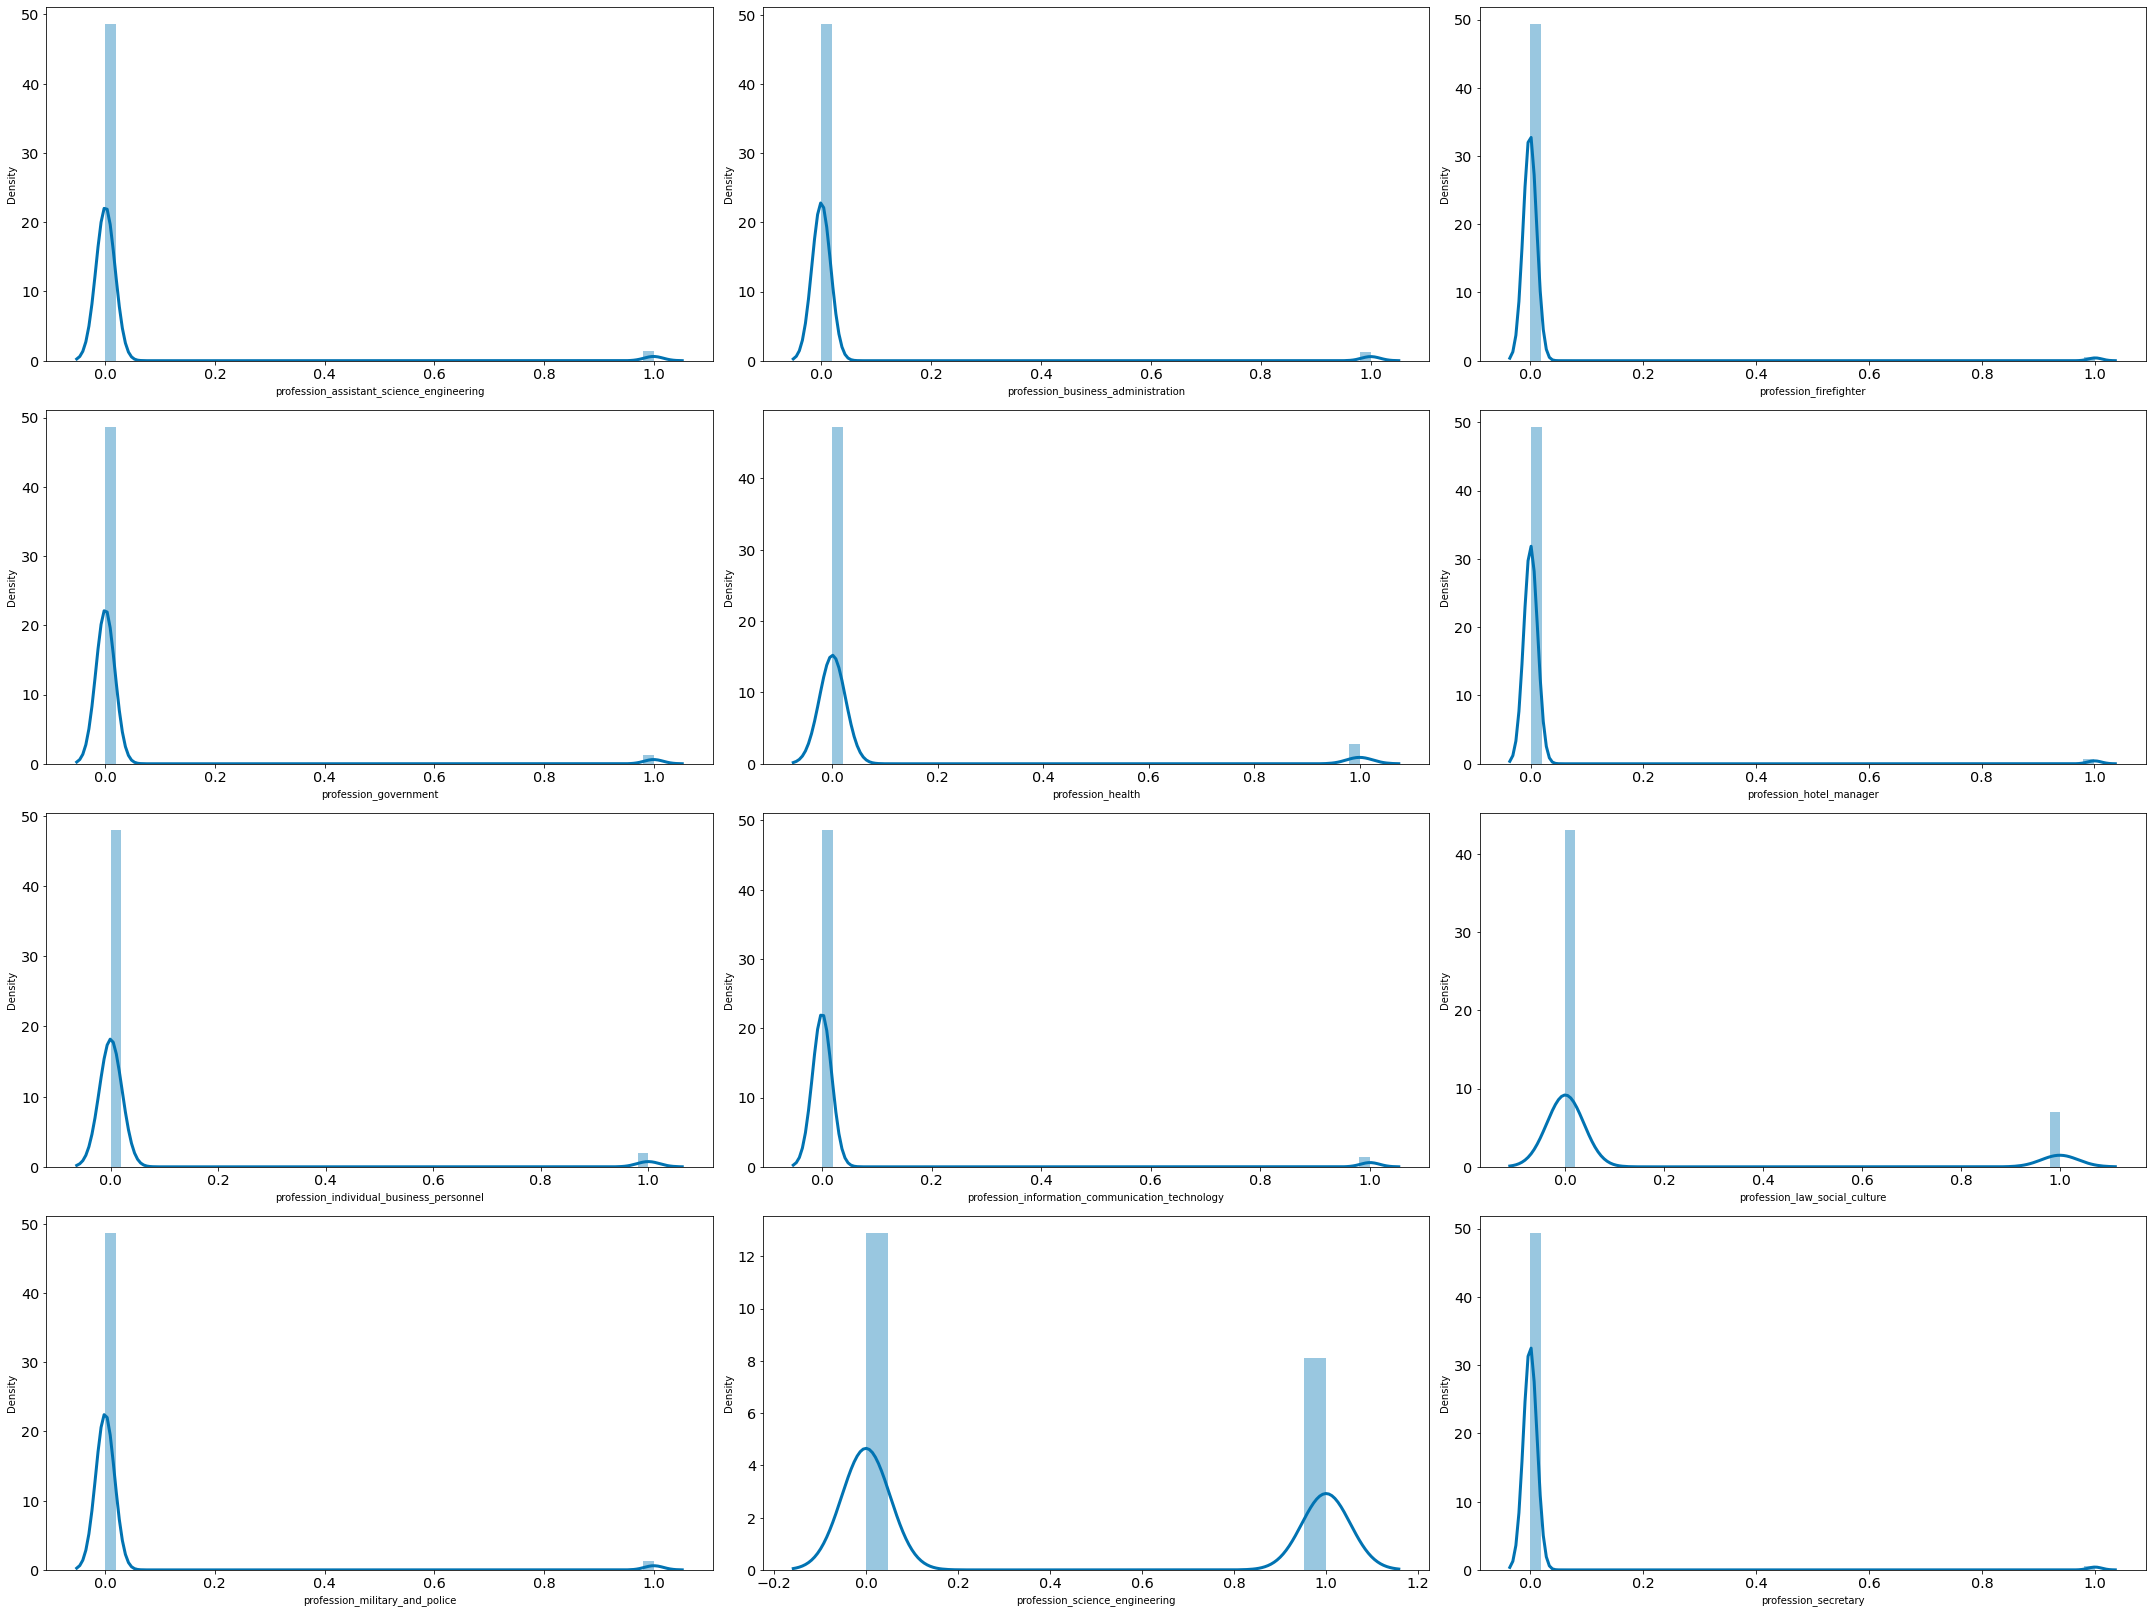

In [ ]:
sns.set_palette("colorblind")
plt.figure(figsize=(30, 50))
list(enumerate(profession))
for i in (enumerate(profession)):
    plt.subplot(9, 3, i[0]+1)
    sns.distplot(df[i[1]])
    plt.tight_layout()

* Dari distribution plot diatas menujukkan bahwa masing-masing feature profession memiliki nilai binary
* Untuk feature profession_science_engineering memiliki nilai 1 yang tinggi dikarenakan dari data ditemukan bahwa banyak pekerjaan yang tergolong science engineering mengajukan loan application

In [ ]:
a = df.iloc[:,10:22]
b = df.iloc[:,-1]
profession_1 = pd.concat([a, b], axis=1)
profession_1.corr()

,profession_assistant_science_engineering,profession_business_administration,profession_firefighter,profession_government,profession_health,profession_hotel_manager,profession_individual_business_personnel,profession_information_communication_technology,profession_law_social_culture,profession_military_and_police,profession_science_engineering,profession_secretary,risk_flag
profession_assistant_science_engineering,1.000000,-0.026777,-0.018418,-0.027467,-0.040243,-0.019187,-0.033614,-0.027655,-0.066669,-0.027144,-0.131585,-0.018655,-0.083605
profession_business_administration,-0.026777,1.000000,-0.017893,-0.026685,-0.039097,-0.018641,-0.032657,-0.026868,-0.064770,-0.026371,-0.127837,-0.018124,-0.081870
profession_firefighter,-0.018418,-0.017893,1.000000,-0.018355,-0.026892,-0.012822,-0.022463,-0.018481,-0.044552,-0.018139,-0.087932,-0.012466,-0.058176
profession_government,-0.027467,-0.026685,-0.018355,1.000000,-0.040105,-0.019122,-0.033499,-0.027561,-0.066441,-0.027051,-0.131136,-0.018592,-0.084060
profession_health,-0.040243,-0.039097,-0.026892,-0.040105,1.000000,-0.028015,-0.049080,-0.040380,-0.097344,-0.039633,-0.192128,-0.027239,-0.098373
profession_hotel_manager,-0.019187,-0.018641,-0.012822,-0.019122,-0.028015,1.000000,-0.023401,-0.019253,-0.046412,-0.018896,-0.091604,-0.012987,-0.060972
profession_individual_business_personnel,-0.033614,-0.032657,-0.022463,-0.033499,-0.049080,-0.023401,1.000000,-0.033728,-0.081309,-0.033104,-0.160480,-0.022752,-0.096205
profession_information_communication_technology,-0.027655,-0.026868,-0.018481,-0.027561,-0.040380,-0.019253,-0.033728,1.000000,-0.066896,-0.027236,-0.132033,-0.018719,-0.083154
profession_law_social_culture,-0.066669,-0.064770,-0.044552,-0.066441,-0.097344,-0.046412,-0.081309,-0.066896,1.000000,-0.065658,-0.318292,-0.045126,-0.113451
profession_military_and_police,-0.027144,-0.026371,-0.018139,-0.027051,-0.039633,-0.018896,-0.033104,-0.027236,-0.065658,1.000000,-0.129591,-0.018373,-0.072439


<AxesSubplot:>

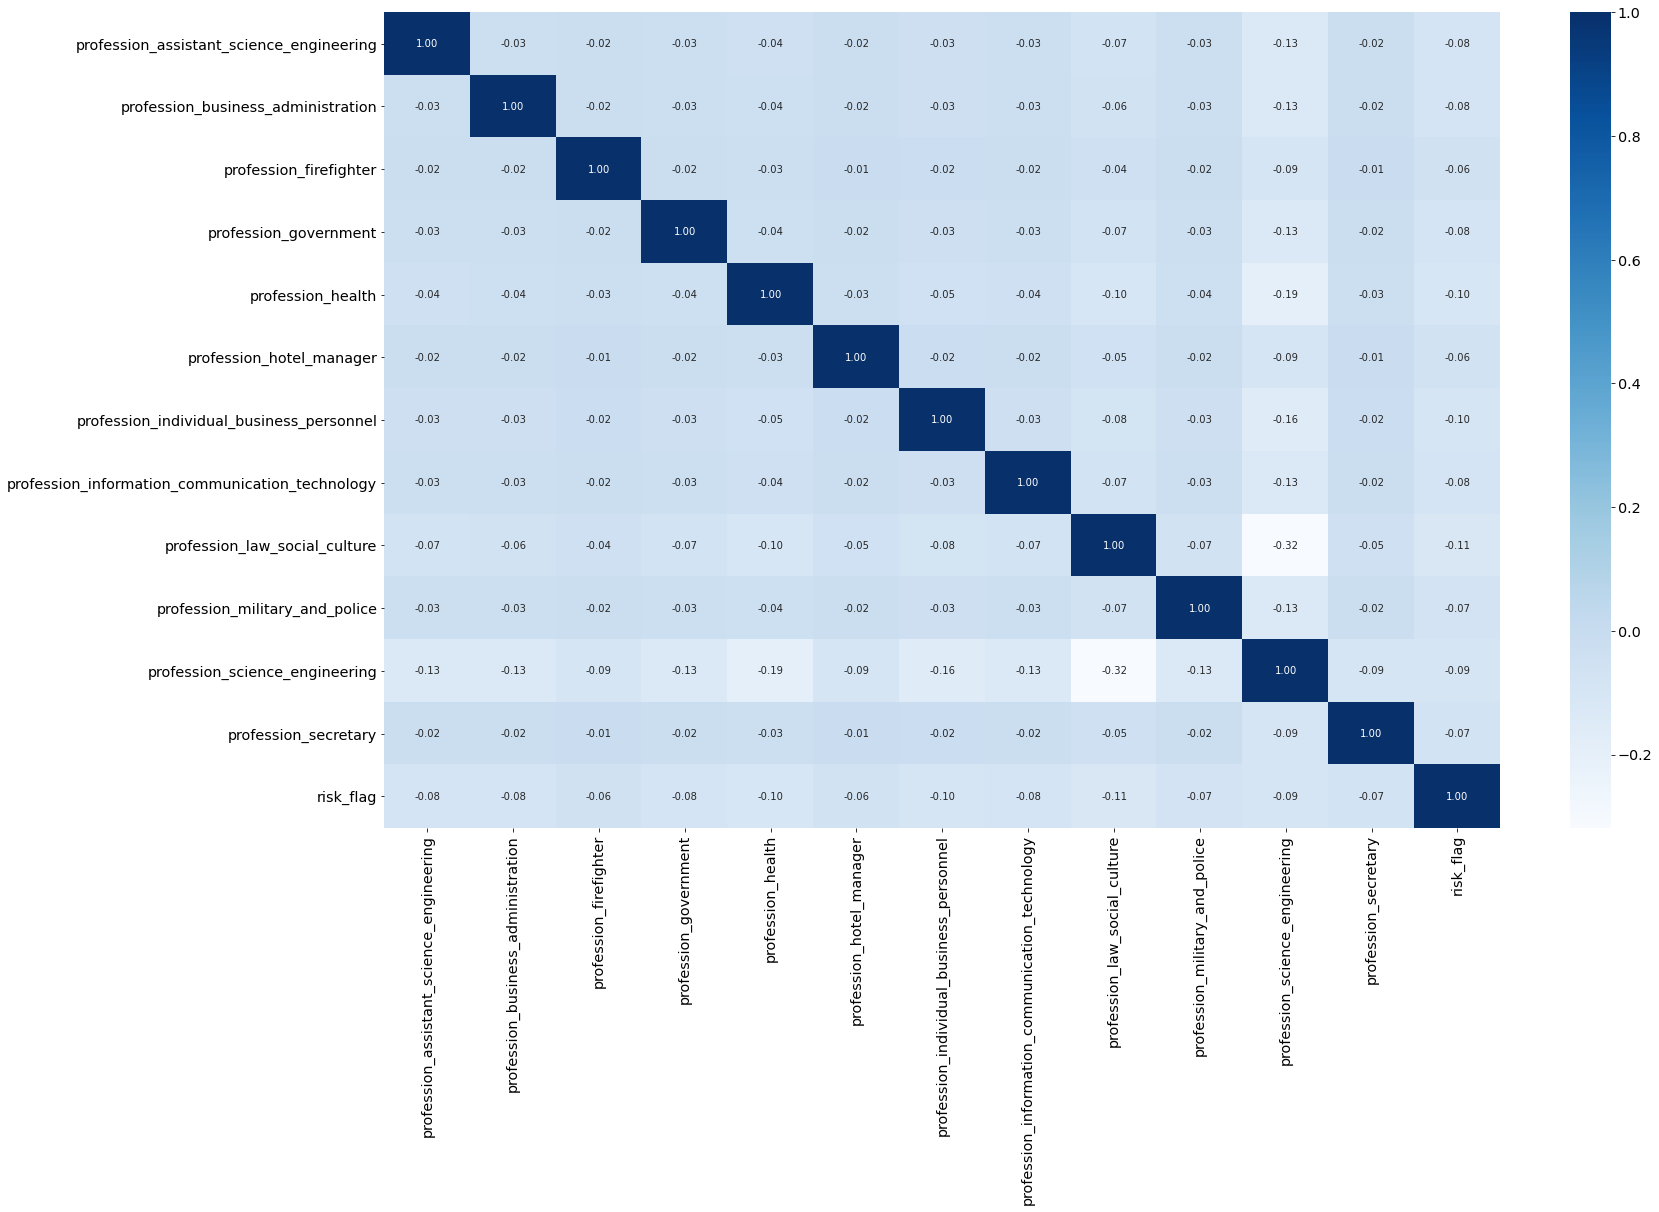

In [ ]:
plt.figure(figsize=(25, 15))
sns.heatmap(profession_1.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
corr_profession_1 = profession_1.corr()
corr_profession_1["risk_flag"].sort_values(ascending=False)

risk_flag                                          1.000000
profession_firefighter                            -0.058176
profession_hotel_manager                          -0.060972
profession_secretary                              -0.066407
profession_military_and_police                    -0.072439
profession_business_administration                -0.081870
profession_information_communication_technology   -0.083154
profession_assistant_science_engineering          -0.083605
profession_government                             -0.084060
profession_science_engineering                    -0.091742
profession_individual_business_personnel          -0.096205
profession_health                                 -0.098373
profession_law_social_culture                     -0.113451
Name: risk_flag, dtype: float64

* Dari analisa `korelasi` baik secara `numeric maupun chart`, didapatkan informasi bahwa masing-masing feature mempunyai hubungan yang `lemah` terhadap target klasifikasi `risk_flag`. Sehingga dapat disimpulkan bahwa hubungan antara feature dan target klasifikasi bersifat `non-linear`
* tidak ada feature yang mempunyai `korelasi positif` yang terdekat dengan `risk_flag`
* `profession_law_social_culture ` mempunyai `korelasi negatif` yang terjauh dengan `risk_flag`

### Plot-plot Kategori State

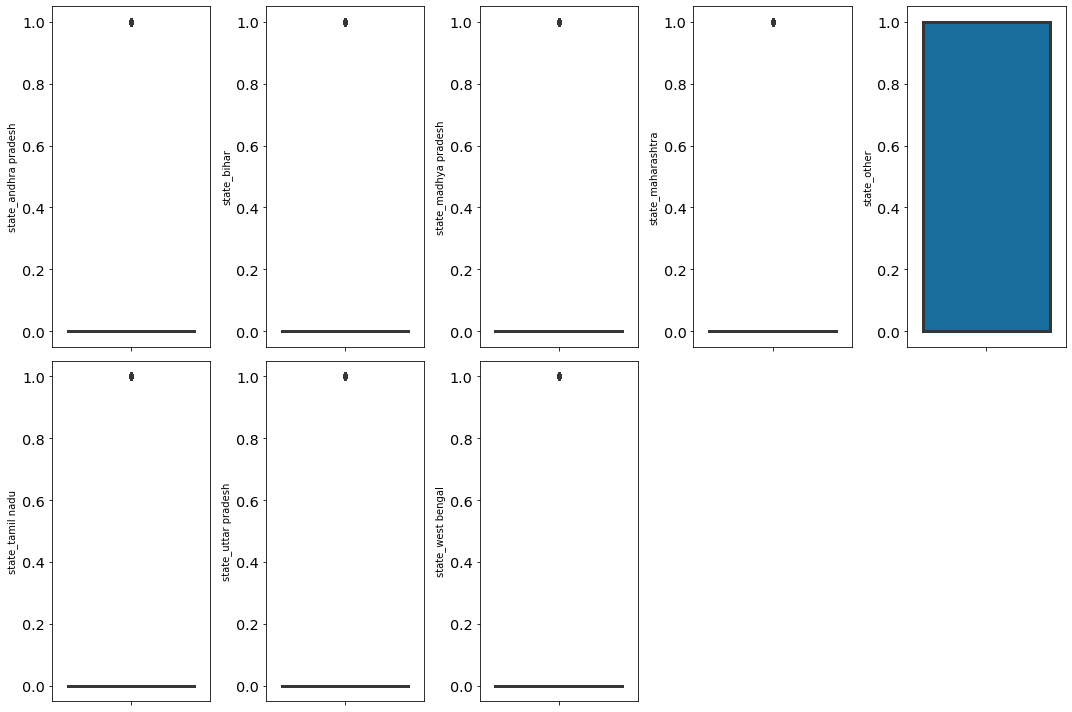

In [ ]:
sns.set_palette("colorblind")
plt.figure(figsize=(15, 10))
list(enumerate(state))
for i in (enumerate(state)) :
    plt.subplot(2,5,i[0]+1)
    sns.boxplot(y=df[i[1]], orient='v')
    plt.tight_layout()

* Grafik boxplot `kategori state` diatas menunjukkan bahwa `tidak ada outlier` di masing-masing feature
* Untuk feature `state_other` meunjukan nilai berbeda diantara state yang lain, hal ini dikarenakan state other merupakan gabungan dari beberapa state yang telat di pre-processed dengan treshold 20%

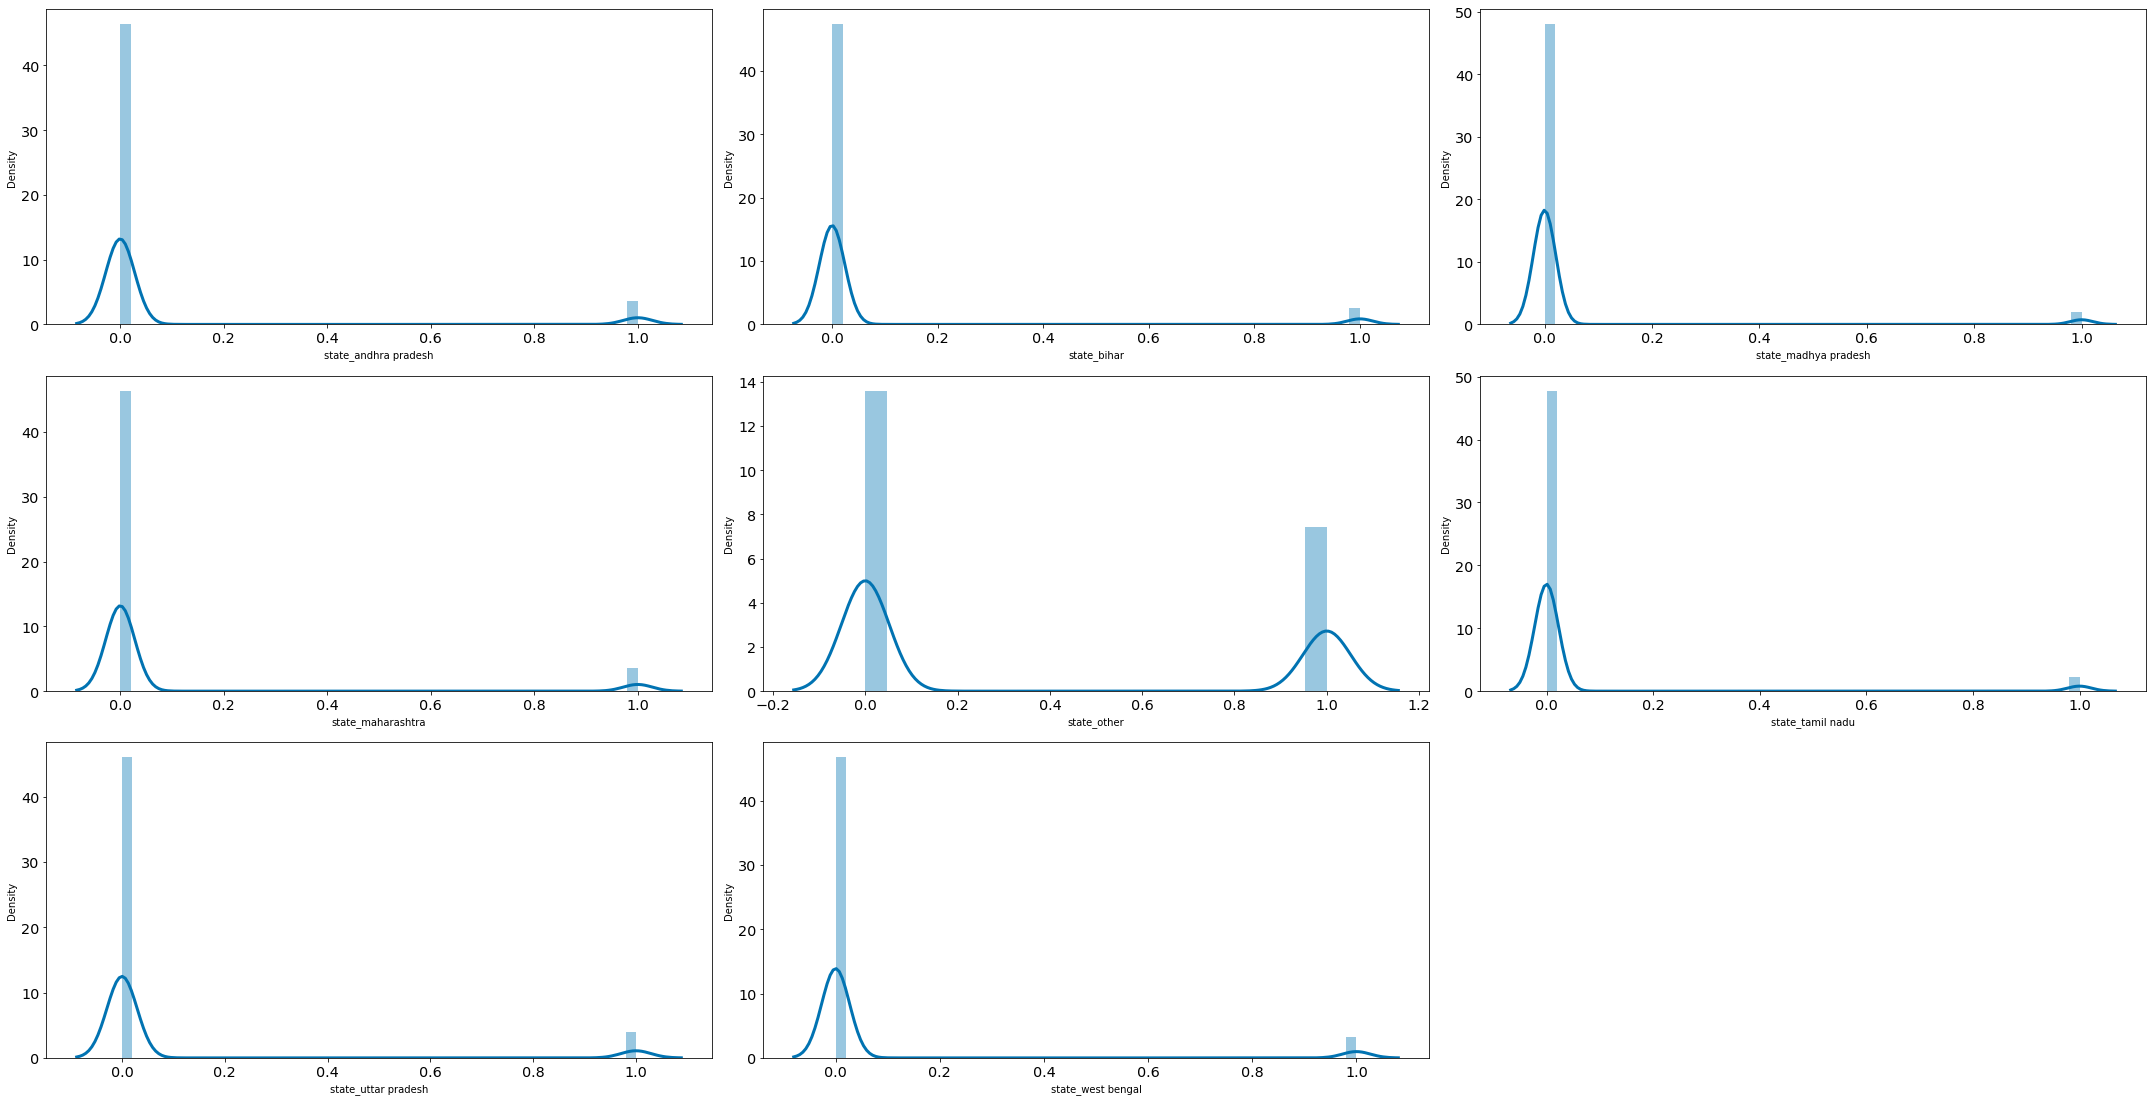

In [ ]:
sns.set_palette("colorblind")
plt.figure(figsize=(30, 20))
list(enumerate(state))
for i in (enumerate(state)):
    plt.subplot(4, 3, i[0]+1)
    sns.distplot(df[i[1]])
    plt.tight_layout()

* Dari distribution plot diatas menunjukkan bahwa masing-masing feature state memiliki nilai binary
* Untuk feature state_other memiliki nilai 1 yang tinggi dikarenakan penjumlahan dari berbagai state yang telah dikelompokkan dalam treshold 20%

In [ ]:
state_1 = df.iloc[:,22:]
state_1.corr()

,state_andhra pradesh,state_bihar,state_madhya pradesh,state_maharashtra,state_other,state_tamil nadu,state_uttar pradesh,state_west bengal,risk_flag
state_andhra pradesh,1.000000,-0.065995,-0.056363,-0.078103,-0.206072,-0.060521,-0.082491,-0.074134,-0.105048
state_bihar,-0.065995,1.000000,-0.047719,-0.066126,-0.174471,-0.051241,-0.069841,-0.062765,-0.117825
state_madhya pradesh,-0.056363,-0.047719,1.000000,-0.056475,-0.149005,-0.043762,-0.059647,-0.053604,-0.087829
state_maharashtra,-0.078103,-0.066126,-0.056475,1.000000,-0.206481,-0.060642,-0.082655,-0.074281,-0.107841
state_other,-0.206072,-0.174471,-0.149005,-0.206481,1.000000,-0.160000,-0.218080,-0.195987,-0.083942
state_tamil nadu,-0.060521,-0.051241,-0.043762,-0.060642,-0.160000,1.000000,-0.064048,-0.057560,-0.094601
state_uttar pradesh,-0.082491,-0.069841,-0.059647,-0.082655,-0.218080,-0.064048,1.000000,-0.078454,-0.119658
state_west bengal,-0.074134,-0.062765,-0.053604,-0.074281,-0.195987,-0.057560,-0.078454,1.000000,-0.115011
risk_flag,-0.105048,-0.117825,-0.087829,-0.107841,-0.083942,-0.094601,-0.119658,-0.115011,1.000000


<AxesSubplot:>

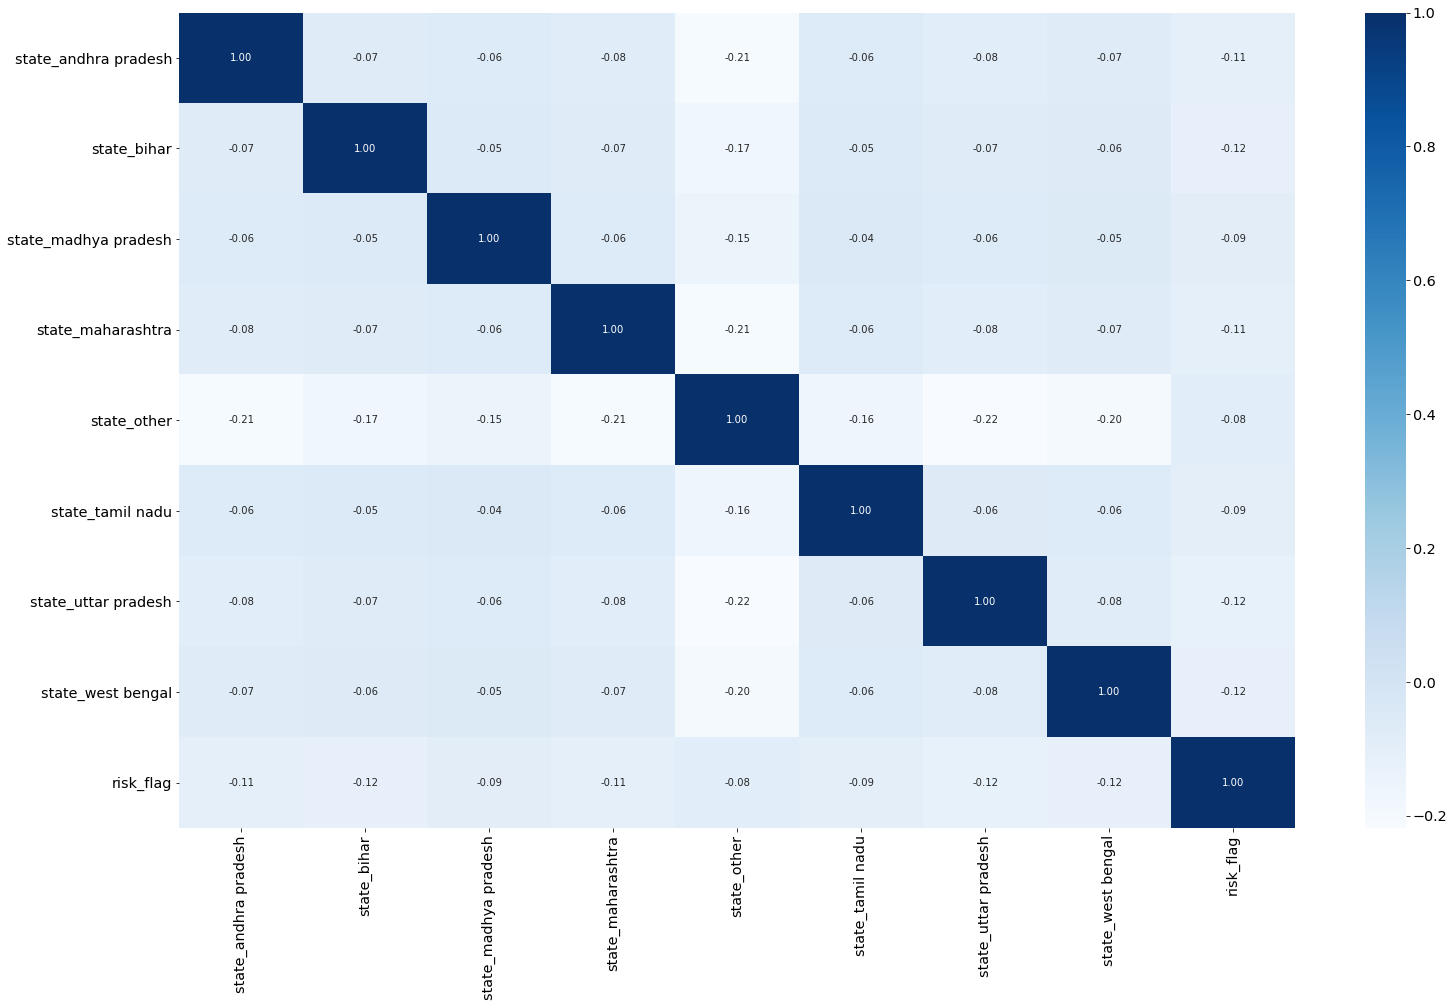

In [ ]:
plt.figure(figsize=(25, 15))
sns.heatmap(state_1.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
corr_state_1 = state_1.corr()
corr_state_1["risk_flag"].sort_values(ascending=False)

risk_flag               1.000000
state_other            -0.083942
state_madhya pradesh   -0.087829
state_tamil nadu       -0.094601
state_andhra pradesh   -0.105048
state_maharashtra      -0.107841
state_west bengal      -0.115011
state_bihar            -0.117825
state_uttar pradesh    -0.119658
Name: risk_flag, dtype: float64

* Dari analisa `korelasi` baik secara `numeric maupun chart`, didapatkan informasi bahwa masing-masing feature mempunyai hubungan yang `lemah` terhadap target klasifikasi `risk_flag`. Sehingga dapat disimpulkan bahwa hubungan antara feature dan target klasifikasi bersifat `non-linear`
* Tidak terdapat feature yang mempunyai `korelasi positif` yang terdekat dengan `risk_flag`
* `state_uttar pradesh` mempunyai `korelasi negatif` yang terjaug dengan `risk_flag`